# 1回目の効率的フロンティアの描画

In [1]:
%matplotlib inline
#%% NumPyの読み込み
import numpy as np
#   NumPyのLinalgモジュールの読み込み
import numpy.linalg as lin
#   CVXPYの読み込み
import cvxpy as cvx
#   Pandasの読み込み
import pandas as pd
#   MatplotlibのPyplotモジュールの読み込み
import matplotlib.pyplot as plt
#   日本語フォントの設定
from matplotlib.font_manager import FontProperties
import sys
if sys.platform.startswith('win'):
    FontPath = 'C:\\Windows\\Fonts\\meiryo.ttc'
elif sys.platform.startswith('darwin'):
    FontPath = '/System/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc'
elif sys.platform.startswith('linux'):
    FontPath = '/usr/share/fonts/truetype/takao-gothic/TakaoPGothic.ttf'
else:
    print('このPythonコードが対応していないOSを使用しています．')
    sys.exit()
jpfont = FontProperties(fname=FontPath)

import math
import japanize_matplotlib

In [2]:
cd /Users/shintaro/Downloads

/Users/shintaro/Downloads


In [3]:
#data1 = pd.read_csv("/Users/shintaro/Downloads/第2スクリーニング_検証.csv", encoding = 'Shift_Jis')
#data2 = pd.read_csv('3rdscreening_Data(ver1.2).csv', encoding = 'Shift_Jis')

In [4]:
#l_comp1 = data1.columns.tolist()
#l_comp2 = data2['企業名'].tolist()

In [5]:
#len_comp1 = len(l_comp1)
#len_comp2 = len(l_comp2)

In [6]:
"""
for i in range(len_comp1):
    if not(l_comp1[-(i + 1)] in l_comp2):
        del data1[l_comp1[-(i + 1)]]
""" 

'\nfor i in range(len_comp1):\n    if not(l_comp1[-(i + 1)] in l_comp2):\n        del data1[l_comp1[-(i + 1)]]\n'

In [7]:
#del data1['西日本フィナンシャルホールディングス']
#del data1['関西電力']
#del data1['静岡銀行']
#del data1['キヤノン']

In [8]:
#marketcap = data1

In [9]:
#comp_list = marketcap.columns.tolist()
#comp_list.insert(0, '日経平均')
#comp_list.insert(1, 'TOPIX')
#comp_list

In [10]:
marketcap = pd.read_csv('efficient_frontier(ver1.8).csv', encoding = 'Shift_Jis')#, encoding = 'Shift_jis')
del marketcap['TOPIX']
del marketcap['キヤノン']
del marketcap['銘柄名称']
del marketcap['日経平均']
#del marketcap['Date']
#del marketcap['エーザイ']

In [11]:
marketcap.drop(index=[61, 62, 63], inplace=True)

In [12]:
marketcap

エーザイ  ファンケル  デンソー  三菱総合研究所  日本郵船  大日本印刷   京セラ  ＫＤＤＩ  ローソン   東洋紡  コニカミノルタ  \
0    6044   1721  4046     3180  1840   2308  4891  3145  7910  1950      836   
1    6030   1633  4272     3125  1880   2104  4916  3036  7260  1640      932   
2    6287   1717  4000     3170  1880   1972  4823  3115  7970  1690      850   
3    6698   1587  4565     3335  2150   2108  5110  3192  7980  1720      941   
4    6609   1581  4980     3240  2120   2164  5436  2999  7920  1720     1092   
..    ...    ...   ...      ...   ...    ...   ...   ...   ...   ...      ...   
56   7419   3735  7347     4120  3775   2319  7025  3395  5430  1424      600   
57   7129   3570  7059     4120  4290   2171  6637  3306  4900  1322      618   
58   7358   3450  7503     3900  4515   2359  6722  3717  4930  1352      598   
59  10925   3600  7579     3945  5630   2349  6868  3465  5140  1333      614   
60   8983   3470  7482     3985  5880   2566  6737  3332  5490  1384      560   

    ヤマト  三菱商事  アウトソーシング  三菱電機  
0   562  1779       775  1218  
1   509  2156       774  1351  
2   527  2285       876  1283  
3   577  2291       798  1423  
4   549  2472       725  1577  
..  ...   ...       ...   ...  
56  673  3130      1784  1687  
57  661  3020      1681  1682  
58  781  2984      2021  1692  
59  800  3028      2019  1613  
60  784  3062      2081  1476  

[61 rows x 15 columns]

In [13]:
R = (marketcap.diff()/marketcap.shift(1))[1:] * 100 

In [14]:
R

エーザイ      ファンケル       デンソー    三菱総合研究所       日本郵船      大日本印刷  \
1   -0.231635  -5.113306   5.585764  -1.729560   2.173913  -8.838821   
2    4.262023   5.143907  -6.367041   1.440000   0.000000  -6.273764   
3    6.537299  -7.571345  14.125000   5.205047  14.361702   6.896552   
4   -1.328755  -0.378072   9.090909  -2.848576  -1.395349   2.656546   
5    1.497957   3.352309   1.666667   1.543210   2.358491   6.746765   
6   -7.349434  -4.651163  -3.199684  -0.759878  10.599078  -0.519481   
7    1.383749   6.354300   1.856764  -2.756508   3.333333   6.353351   
8   -8.522457  -3.439952  -1.903045   1.574803  -5.241935  -1.800327   
9    1.526718  17.187500  -2.001225   0.155039  -4.680851   3.333333   
10  -0.273411  10.880000  -1.625339  -3.715170 -10.267857  -0.725806   
11   6.322824  -0.673401   0.444821   4.823151   3.980100   1.380991   
12  -4.609186  14.866828  11.893716  -2.760736   0.956938  -2.483974   
13  -3.801318   9.064081   0.565398  -0.946372   3.317536   6.655711   
14   1.440112  -6.068806   6.690405   5.573248   7.293578   3.736518   
15   9.020083  22.716049   8.765150   1.508296   1.881146   0.445600   
16   1.175163   7.813548   1.824935  11.738484   9.861519  -9.242144   
17   0.706326   3.576983   7.264076   5.053191   5.003820   2.362525   
18  -2.883416   3.153153   0.887180  -6.202532  -0.654784  -3.302825   
19  -8.586102  12.081514  -7.885095  -6.072874 -14.610033  -7.366255   
20  19.048455   1.168831  -7.398568  -3.591954  -7.890223  -2.354509   
21   8.317357  10.397946  -1.099656  14.307004   8.659218   7.279345   
22   7.243022  16.976744  -8.095900  27.118644  -4.927164  -0.678541   
23  -0.926749  10.337972   2.306238   4.000000  -0.901307   5.849701   
24  22.783188   5.405405   1.699926 -14.990138  -2.273761  -1.694232   
25   4.988520  -2.393162  -2.707122  -1.972158  -2.466263   2.297907   
26   9.940358  -2.276708  12.026144   3.668639   1.956107   5.976735   
27 -14.909584 -10.573477 -15.819303 -19.634703 -14.599906  -4.049962   
28  10.668367 -40.641283   3.900990   9.659091   5.589041   3.589744   
29 -18.367739  -5.232951  -6.746712 -18.264249 -12.247016 -12.528561   
30  -0.976241 -16.138226   1.941549   0.792393   7.510349   9.534175   
31   9.217247   7.264231  -4.129912   2.358491  -3.465347   2.464229   
32 -32.430669  13.267327  -9.723965   2.764977  -7.578348   2.676493   
33   3.878963  15.384615  12.416030  -7.922272  16.892725  -0.528901   
34  -1.100093 -11.030303 -13.414383   5.032468 -13.343882 -10.558299   
35  -4.574651  -9.741144   7.877201   3.863988   5.234327  -2.505308   
36  -3.037268   3.849057   2.316347  19.047619   5.436669  -0.087108   
37  -8.059600  -6.250000  -3.880983  -9.750000 -13.000549   0.217960   
38   1.123389  11.356589   6.527591  -0.692521  13.808323  21.400609   
39  43.635039   7.030978   6.590861   7.391911   8.753463   4.192046   
40   2.827438  -4.975610  -3.437377   8.441558  -4.279165   0.653370   
41   1.159063  -0.342231   1.595745   3.592814   5.428419   1.127434   
42   1.523647  -0.686813  -8.538059   0.115607 -10.449268   2.871622   
43  -4.178173  -8.091286  -7.089388 -12.933025 -12.965051 -14.778325   
44  -0.626488  -8.690745 -17.274882 -12.732095 -16.709845 -11.329480   
45  -5.056109   6.963329   9.195073  10.790274  11.197512  -0.478053   
46  12.058433  17.873652   8.368311  13.717421   8.601399   6.943231   
47   1.279924   4.411765   1.791334   3.860072  -2.382486   0.816660   
48  -0.690381  -5.164319  -8.014269  -2.439024 -10.290237  -7.087890   
49   9.166961  14.356436  15.227508  -6.666667  21.911765  -1.743679   
50   3.443065  -1.154401   3.141126  13.010204   9.589867  -5.678793   
51 -15.598915  -4.233577   5.242549 -14.672686   5.393506  -8.795861   
52  -2.497218  29.115854   1.880943  10.052910  18.851175   0.876741   
53  -6.529732  -2.833530  24.447150   2.764423   5.536028  -5.163599   
54   3.676072  -6.561361  -5.330942  -1.637427   0.166528  -2.964960   
55  -4.239173  -1.300390  10.005166  -4.518430  2

In [15]:
#%% 最小分散ポートフォリオの計算
Mu = R.mean().values
Stdev = R.std().values
CorrMatrix = R.corr().values
Sigma = np.diag(Stdev) @ CorrMatrix @ np.diag(Stdev)
iota = np.ones(Mu.shape)

In [16]:
inv_Sigma = lin.inv(Sigma)
A = Mu @ inv_Sigma @ iota
B = Mu @ inv_Sigma @ Mu
C = iota @ inv_Sigma @ iota
D = B * C - A ** 2
V_Target = np.linspace(Mu.min(), Mu.max(), num=5)
V_Risk = np.zeros(V_Target.shape)
V_Weight = np.zeros((V_Target.shape[0], Mu.shape[0]))
for idx, Target_Return in enumerate(V_Target):
    V_Weight[idx, :] = (C * Target_Return - A) / D * lin.solve(Sigma, Mu) \
                       + (B - A * Target_Return) / D * lin.solve(Sigma, iota)
    V_Risk[idx] = (C / D) * (Target_Return - A / C) ** 2 + 1.0 / C

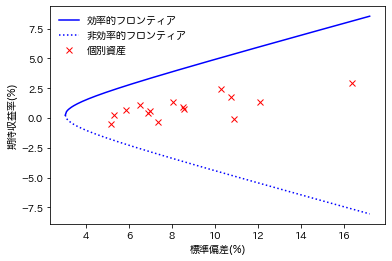

In [17]:
#%% 最小分散フロンティアの作図
sigma_gmv = 1.0 / np.sqrt(C)
sigma_p = np.linspace(sigma_gmv, 1.05 * np.max(Stdev), num=250)
mu_p_efficient = (A + np.sqrt(np.abs(C * sigma_p ** 2 - 1.0) * D)) / C
mu_p_inefficient = (A - np.sqrt(np.abs(C * sigma_p ** 2 - 1.0) * D)) / C
fig1 = plt.figure(num=1, facecolor='w')
plt.plot(sigma_p, mu_p_efficient, 'b-')
plt.plot(sigma_p, mu_p_inefficient, 'b:')
plt.plot(np.sqrt(np.diagonal(Sigma)), Mu, 'rx')
plt.legend(['効率的フロンティア', '非効率的フロンティア', '個別資産'],
           loc='best', frameon=False, prop=jpfont)
plt.xlabel('標準偏差(%)', fontproperties=jpfont)
plt.ylabel('期待収益率(%)', fontproperties=jpfont)
#plt.savefig('efficient_frontier.png', dpi=1000)
plt.show()

In [18]:
#%% 空売り制約の下での分散最小化問題の設定
Weight = cvx.Variable(Mu.shape[0])
Target_Return = cvx.Parameter(nonneg=False)
Risk_Variance = cvx.quad_form(Weight, Sigma)
Opt_Portfolio = cvx.Problem(cvx.Minimize(Risk_Variance),
                            [Weight.T @ Mu == Target_Return,
                             cvx.sum(Weight) == 1.0,
                             Weight >= 0.0])

In [19]:
#%% 空売り制約の下での最小分散フロンティアの計算
V_Target = np.linspace(Mu.min(), Mu.max(), num=250)
V_Risk = np.zeros(V_Target.shape)
V_Weight = np.zeros((V_Target.shape[0], Mu.shape[0]))
for idx, Target_Return.value in enumerate(V_Target):
    Opt_Portfolio.solve(solver=cvx.ECOS)
    V_Weight[idx, :] = Weight.value.T
    V_Risk[idx] = np.sqrt(Risk_Variance.value)

Text(0, 0.5, '期待収益率(%)')

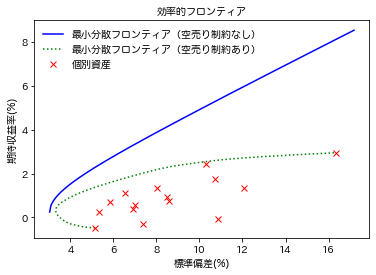

In [20]:
#%% 最小分散フロンティアの作図
sigma_gmv = 1.0 / np.sqrt(C)
sigma_p = np.linspace(sigma_gmv, 1.05 * np.max(Stdev), num=250)
mu_p_efficient = (A + np.sqrt(np.abs(C * sigma_p ** 2 - 1.0) * D)) / C
fig2 = plt.figure(num=2, facecolor='w')           
plt.plot(sigma_p, mu_p_efficient, 'b-')
plt.plot(V_Risk, V_Target, 'g:')
plt.plot(np.sqrt(np.diagonal(Sigma)), Mu, 'rx')
plt.legend(['最小分散フロンティア（空売り制約なし）',
            '最小分散フロンティア（空売り制約あり）',
            '個別資産'],
           loc='best', frameon=False, prop=jpfont)
plt.title('効率的フロンティア', fontproperties=jpfont)
plt.xlabel('標準偏差(%)', fontproperties=jpfont)
plt.ylabel('期待収益率(%)', fontproperties=jpfont)
#plt.savefig('efficient_frontier(空売り制約あり)_改.png', dpi=1500)

In [21]:
np. sqrt(Risk_Variance.value)


16.36670389570862

In [22]:
max(V_Risk)

16.36670389570862

In [23]:
V_Risk

array([ 5.14476846,  4.92085105,  4.76192244,  4.64617533,  4.55916574,
        4.48807313,  4.41949877,  4.35356162,  4.29038329,  4.23008737,
        4.17279883,  4.11864315,  4.06774548,  4.02022956,  3.97621661,
        3.93582417,  3.89916476,  3.86634455,  3.83746208,  3.81137856,
        3.78692045,  3.76379939,  3.74160137,  3.72007042,  3.69921067,
        3.67903351,  3.65955025,  3.64077202,  3.62270884,  3.60515936,
        3.58796858,  3.57114167,  3.55468381,  3.53860014,  3.52289579,
        3.50757586,  3.49264526,  3.47809694,  3.46392783,  3.45025666,
        3.43723473,  3.42486993,  3.41316942,  3.40214005,  3.39178836,
        3.38212059,  3.3731426 ,  3.36485992,  3.35727771,  3.3504007 ,
        3.34423325,  3.33877394,  3.33401719,  3.32996587,  3.32662255,
        3.32398939,  3.32206804,  3.32085978,  3.32036535,  3.32060301,
        3.32159062,  3.32332749,  3.32581245,  3.32904384,  3.33301947,
        3.33773669,  3.34320274,  3.34953934,  3.35677832,  3.36

In [24]:
Stdev

array([12.07626029, 10.72615829,  8.0312312 ,  8.56599059, 10.28198935,
        6.89028461,  5.84234027,  5.31737417,  5.14476846,  7.35994135,
       10.86506864,  8.49667428,  6.52998869, 16.3667039 ,  6.99196629])

In [25]:
Mu

array([ 1.33063375,  1.77533357,  1.34318653,  0.73664327,  2.45970328,
        0.40602085,  0.70274427,  0.23785123, -0.47416147, -0.29334974,
       -0.08101385,  0.91951308,  1.1144148 ,  2.95279972,  0.56353099])

<Figure size 432x288 with 0 Axes>

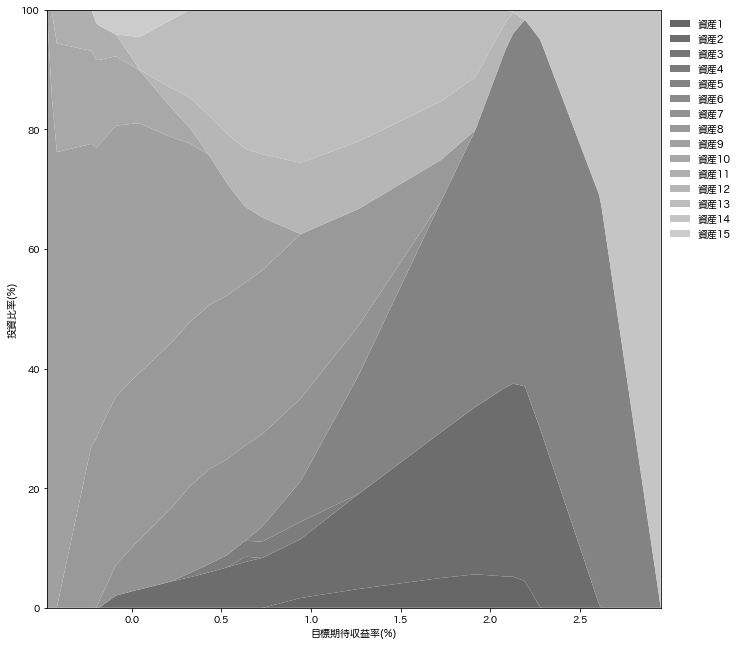

In [26]:
#   投資比率の推移の作図
fig3 = plt.figure(num=3, facecolor='w')
plt.figure(figsize=(11, 11))
plt.stackplot(V_Target, V_Weight.T*100,
              colors=tuple([tuple(gray*np.ones(3))
                            for gray in np.linspace(0.4, 0.8, num=Mu.shape[0])
                            ]))
plt.axis([Mu.min(), Mu.max(), 0.0, 100.0])
plt.legend(['資産1', '資産2', '資産3', '資産4', '資産5', '資産6', '資産7', '資産8', '資産9', '資産10', '資産11', '資産12', '資産13', '資産14', '資産15', '資産16', '資産17', '資産18', '資産19', '資産20', '資産21', '資産22', '資産23', '資産24', '資産25', '資産26', '資産27', '資産28', '資産29', '資産30', '資産31', '資産32', '資産33', '資産34', '資産35', '資産36', '資産37', '資産38', '資産39', '資産40', '資産41', '資産42', '資産43', '資産44', '資産45', '資産46', '資産47', '資産48', '資産49', '資産50', '資産51', '資産52', '資産53', '資産54', '資産55', '資産56', '資産57'],
           loc='upper left', bbox_to_anchor=(1.0, 1.0),
           frameon=False, prop=jpfont)
plt.xlabel('目標期待収益率(%)', fontproperties=jpfont)
plt.ylabel('投資比率(%)', fontproperties=jpfont)
#plt.savefig('投資割合.png', dpi=1000)
plt.show()

In [27]:
for i in range(len(V_Weight)):
    if V_Target[i] <= 0 or V_Risk[i] >= 18:
        
        print('(',i,') 目標収益率=%.3f リスク=%.3f 効用=%.3f'
          
              %(V_Target[i],V_Risk[i],0))#math.log(-V_Target[i])+math.log(18-V_Risk[i])*100))
        
    else:
        print('(',i,') 目標収益率=%.3f リスク=%.3f 効用=%.3f'
              
              %(V_Target[i],V_Risk[i],math.log(V_Target[i])+math.log(18-V_Risk[i])*100))
              
    print('ポートフォリオ=%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f'#,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f'#,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f'
          %(V_Weight[i][0],V_Weight[i][1],V_Weight[i][2],V_Weight[i][3],V_Weight[i][4],V_Weight[i][5],V_Weight[i][6],V_Weight[i][7],V_Weight[i][8],V_Weight[i][9],V_Weight[i][10],V_Weight[i][11],V_Weight[i][12],V_Weight[i][13],V_Weight[i][14]))#,V_Weight[i][15],V_Weight[i][16],V_Weight[i][17],V_Weight[i][18],V_Weight[i][19],V_Weight[i][20],V_Weight[i][21],V_Weight[i][22],V_Weight[i][23],V_Weight[i][24],V_Weight[i][25],V_Weight[i][26],V_Weight[i][27],V_Weight[i][28],V_Weight[i][29],V_Weight[i][30],V_Weight[i][31],V_Weight[i][32],V_Weight[i][33],V_Weight[i][34],V_Weight[i][35]))#,V_Weight[i][36],V_Weight[i][37],V_Weight[i][38],V_Weight[i][39],V_Weight[i][40],V_Weight[i][41],V_Weight[i][42],V_Weight[i][43],V_Weight[i][44],V_Weight[i][45],V_Weight[i][46],V_Weight[i][47],V_Weight[i][48],V_Weight[i][49],V_Weight[i][50],V_Weight[i][51],V_Weight[i][52],V_Weight[i][53],V_Weight[i][54],V_Weight[i][55]))
    print()

( 0 ) 目標収益率=-0.474 リスク=5.145 効用=0.000
ポートフォリオ=0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,1.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000

( 1 ) 目標収益率=-0.460 リスク=4.921 効用=0.000
ポートフォリオ=-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.924,0.076,-0.000,-0.000,-0.000,-0.000,-0.000

( 2 ) 目標収益率=-0.447 リスク=4.762 効用=0.000
ポートフォリオ=-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.852,0.145,0.004,-0.000,-0.000,-0.000,-0.000

( 3 ) 目標収益率=-0.433 リスク=4.646 効用=0.000
ポートフォリオ=-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.807,0.163,0.030,-0.000,-0.000,-0.000,-0.000

( 4 ) 目標収益率=-0.419 リスク=4.559 効用=0.000
ポートフォリオ=0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.762,0.182,0.056,0.000,0.000,0.000,0.000

( 5 ) 目標収益率=-0.405 リスク=4.488 効用=0.000
ポートフォリオ=-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.019,0.744,0.180,0.057,-0.000,-0.000,-0.000,0.000

( 6 ) 目標収益率=-0.392 リスク=4.419 効用=0.000
ポートフォリオ=0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.039,0.725,0.178,0.058,0.000,0.000,0.

In [28]:
#(math.log(-1 * V_Target[0])+
(math.log(18-V_Risk[0]))#*100

2.5537508525736374

In [29]:
#
# 最適ポートフォリオの決定
#

umax=0
for i in range(len(V_Weight)):
    if V_Target[i] <= 0:
        u=((math.log(-1 * V_Target[i]))+(-1 * math.log(18-V_Risk[i])))*100
        if u>umax:
            umax=u
            maxi=i
        print('(',i,') 目標収益率=%.3f リスク=%.3f 効用=%.3f'
              %(V_Target[i],V_Risk[i],u))
        print('ポートフォリオ=%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f'
              %(V_Weight[i][0],V_Weight[i][1],V_Weight[i][2],V_Weight[i][3],V_Weight[i][4],V_Weight[i][5],V_Weight[i][6],V_Weight[i][7],V_Weight[i][8],V_Weight[i][9],V_Weight[i][10],V_Weight[i][11],V_Weight[i][12],V_Weight[i][13],V_Weight[i][14]))
        
    else:
        u=(math.log(V_Target[i])+math.log(18-V_Risk[i]))*100
        if u>umax:
            umax=u
            maxi=i
        print('(',i,') 目標収益率=%.3f リスク=%.3f 効用=%.3f'
              %(V_Target[i],V_Risk[i],u))
        print('ポートフォリオ=%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f'
              %(V_Weight[i][0],V_Weight[i][1],V_Weight[i][2],V_Weight[i][3],V_Weight[i][4],V_Weight[i][5],V_Weight[i][6],V_Weight[i][7],V_Weight[i][8],V_Weight[i][9],V_Weight[i][10],V_Weight[i][11],V_Weight[i][12],V_Weight[i][13],V_Weight[i][14]))
print('\n効用の最大値（',maxi,'）',np.round(umax,3))

( 0 ) 目標収益率=-0.474 リスク=5.145 効用=-329.996
ポートフォリオ=0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,1.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000
( 1 ) 目標収益率=-0.460 リスク=4.921 効用=-334.668
ポートフォリオ=-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.924,0.076,-0.000,-0.000,-0.000,-0.000,-0.000
( 2 ) 目標収益率=-0.447 リスク=4.762 効用=-338.911
ポートフォリオ=-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.852,0.145,0.004,-0.000,-0.000,-0.000,-0.000
( 3 ) 目標収益率=-0.433 リスク=4.646 効用=-342.911
ポートフォリオ=-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.807,0.163,0.030,-0.000,-0.000,-0.000,-0.000
( 4 ) 目標収益率=-0.419 リスク=4.559 効用=-346.792
ポートフォリオ=0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.762,0.182,0.056,0.000,0.000,0.000,0.000
( 5 ) 目標収益率=-0.405 リスク=4.488 効用=-350.658
ポートフォリオ=-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.019,0.744,0.180,0.057,-0.000,-0.000,-0.000,0.000
( 6 ) 目標収益率=-0.392 リスク=4.419 効用=-354.619
ポートフォリオ=0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.039,0.725,0.178,0.058

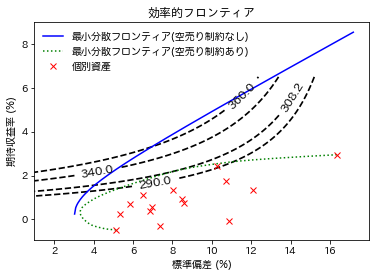

In [30]:
#
#
# 最小分散フロンティアと無差別曲線の作図
#
#

sigma_gmv = 1.0/np.sqrt(C)
sigma_p = np.linspace (sigma_gmv, 1.05*np.max(Stdev), num=250)
mu_p_efficient = (A + np.sqrt(np.abs (C*sigma_p**2 - 1.0)*D))/C

fig, ax = plt.subplots(1, facecolor='w')
ax.plot(sigma_p, mu_p_efficient, 'b-')
ax.plot(V_Risk, V_Target, 'g:')
ax.plot(np.sqrt (np.diagonal (Sigma)), Mu, 'rx')
ax.legend([u'最小分散フロンティア(空売り制約なし)',
    u'最小分散フロンティア(空売り制約あり)',
    u'個別資產'],
    loc='best', frameon=False, prop=jpfont)    
plt.title('効率的フロンティア')
ax.set_xlabel(u'標準偏差 (%)', fontproperties=jpfont)
ax.set_ylabel (u'期待収益率 (%)', fontproperties=jpfont)
"""
#%% 最小分散フロンティアの作図
sigma_gmv = 1.0 / np.sqrt(C)
sigma_p = np.linspace(sigma_gmv, 1.05 * np.max(Stdev), num=250)
mu_p_efficient = (A + np.sqrt(np.abs(C * sigma_p ** 2 - 1.0) * D)) / C
fig2 = plt.figure(num=2, facecolor='w')           
plt.plot(sigma_p, mu_p_efficient, 'b-')
plt.plot(V_Risk, V_Target, 'g:')
plt.plot(np.sqrt(np.diagonal(Sigma)), Mu, 'rx')
plt.legend(['最小分散フロンティア（空売り制約なし）',
            '最小分散フロンティア（空売り制約あり）',
            '個別資産'],
           loc='best', frameon=False, prop=jpfont)
plt.title('効率的フロンティア')
plt.xlabel('標準偏差(%)', fontproperties=jpfont)
plt.ylabel('期待収益率(%)', fontproperties=jpfont)
"""
#
#　無差別曲線の描画
#

# 無差別曲線の作成
wn=100
ret_range = [0.1, 6.5] # リターンのレンジ
risk_range = [1, 16.5] # リスクのレンジ
ret_lin = np.linspace(ret_range[0], ret_range[1], wn) # リターンの刻み
risk_lin = np.linspace(risk_range[0], risk_range[1], wn) # リスクの刻み
ret, risk = np.meshgrid(ret_lin,risk_lin)

U = np.zeros((len(ret_lin), len(risk_lin)))

for ret_i in range(wn):
    for risk_i in range(wn):
        U[risk_i,ret_i] = (math.log(ret_lin[ret_i])+math.log(18-risk_lin[risk_i]))*100
        #print(J[i1, i0])

# 無差別曲線のプロット
cont = plt.contour(risk,ret, U, 30, colors='black',
                   levels=(290, umax, 340, 360),linewidths=1.7,
                   linestyles="dashed")
cont.clabel(fmt='%1.1f', fontsize=12)
#plt.savefig('Frontier_無差別曲線あり(ver1.0).png', dpi=1500)
plt.show()


In [31]:
U

array([[  53.06282511,  102.92586017,  136.04584184, ...,  468.49238076,
         469.5020123 ,  470.5015521 ],
       [  52.13758347,  102.00061853,  135.1206002 , ...,  467.56713912,
         468.57677066,  469.57631046],
       [  51.2037011 ,  101.06673616,  134.18671783, ...,  466.63325675,
         467.64288829,  468.64242808],
       ...,
       [-170.75297352, -120.88993845,  -87.76995679, ...,  244.67658213,
         245.68621368,  246.68575347],
       [-179.78385153, -129.92081646,  -96.8008348 , ...,  235.64570412,
         236.65533567,  237.65487546],
       [-189.71199849, -139.84896342, -106.72898175, ...,  225.71755716,
         226.72718871,  227.7267285 ]])

# 配分が0となっている銘柄の投資額の調整
# 2回目の効率的フロンティアの算出

In [32]:
Asset_Weight_tmp = []

for i in range(15):
    Asset_Weight_tmp.append(round(V_Weight[195][i], 3)) #26

In [33]:
sum(Asset_Weight_tmp)

1.0

In [34]:
Asset_Weight_tmp

[0.037,
 0.321,
 0.0,
 0.0,
 0.62,
 -0.0,
 0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 0.022,
 -0.0]

In [35]:
data_column = marketcap.columns.tolist()

In [36]:
data_column

['エーザイ',
 'ファンケル',
 'デンソー',
 '三菱総合研究所',
 '日本郵船',
 '大日本印刷',
 '京セラ',
 'ＫＤＤＩ',
 'ローソン',
 '東洋紡',
 'コニカミノルタ',
 'ヤマト',
 '三菱商事',
 'アウトソーシング',
 '三菱電機']

In [37]:
for i in range(15):
    if not(Asset_Weight_tmp[i] == 0):
        del marketcap[data_column[i]]

In [38]:
marketcap

デンソー  三菱総合研究所  大日本印刷   京セラ  ＫＤＤＩ  ローソン   東洋紡  コニカミノルタ  ヤマト  三菱商事  三菱電機
0   4046     3180   2308  4891  3145  7910  1950      836  562  1779  1218
1   4272     3125   2104  4916  3036  7260  1640      932  509  2156  1351
2   4000     3170   1972  4823  3115  7970  1690      850  527  2285  1283
3   4565     3335   2108  5110  3192  7980  1720      941  577  2291  1423
4   4980     3240   2164  5436  2999  7920  1720     1092  549  2472  1577
..   ...      ...    ...   ...   ...   ...   ...      ...  ...   ...   ...
56  7347     4120   2319  7025  3395  5430  1424      600  673  3130  1687
57  7059     4120   2171  6637  3306  4900  1322      618  661  3020  1682
58  7503     3900   2359  6722  3717  4930  1352      598  781  2984  1692
59  7579     3945   2349  6868  3465  5140  1333      614  800  3028  1613
60  7482     3985   2566  6737  3332  5490  1384      560  784  3062  1476

[61 rows x 11 columns]

In [39]:
R = (marketcap.diff()/marketcap.shift(1))[1:]*100

In [40]:
R

デンソー    三菱総合研究所      大日本印刷        京セラ       ＫＤＤＩ       ローソン  \
1    5.585764  -1.729560  -8.838821   0.511143  -3.465819  -8.217446   
2   -6.367041   1.440000  -6.273764  -1.891782   2.602108   9.779614   
3   14.125000   5.205047   6.896552   5.950653   2.471910   0.125471   
4    9.090909  -2.848576   2.656546   6.379648  -6.046366  -0.751880   
5    1.666667   1.543210   6.746765   6.916851  -1.300433   3.661616   
6   -3.199684  -0.759878  -0.519481   1.238816   2.364865   0.365408   
7    1.856764  -2.756508   6.353351   4.996601  -3.003300  -5.946602   
8   -1.903045   1.574803  -1.800327   0.388475  -0.578428  -2.580645   
9   -2.001225   0.155039   3.333333   1.741374   1.163587  -1.986755   
10  -1.625339  -3.715170  -0.725806   1.125198   3.721245   2.027027   
11   0.444821   4.823151   1.380991   1.958941  -2.968037   4.105960   
12  11.893716  -2.760736  -2.483974   3.166308  -1.848739  -4.452926   
13   0.565398  -0.946372   6.655711  -1.668653   1.609589  -1.597870   
14   6.690405   5.573248   3.736518   5.787879   0.000000   0.811908   
15   8.765150   1.508296   0.445600   8.034947   1.921132  -0.671141   
16   1.824935  11.738484  -9.242144   4.746122   6.316138   4.594595   
17   7.264076   5.053191   2.362525  -6.682698 -12.752722  -3.229974   
18   0.887180  -6.202532  -3.302825  -1.654686  -1.853832  -1.468625   
19  -7.885095  -6.072874  -7.366255 -12.384499  -4.249909  -5.284553   
20  -7.398568  -3.591954  -2.354509  -5.493468   3.072838   3.719599   
21  -1.099656  14.307004   7.279345  16.555630   8.097166  -0.275862   
22  -8.095900  27.118644  -0.678541  -7.745070   0.306435  -1.936376   
23   2.306238   4.000000   5.849701  -3.237299   2.885268  -2.397743   
24   1.699926 -14.990138  -1.694232   3.857852   2.705378  -3.034682   
25  -2.707122  -1.972158   2.297907   8.045623  -5.525217  -2.831595   
26  12.026144   3.668639   5.976735  -2.710414   6.732404   6.134969   
27 -15.819303 -19.634703  -4.049962 -10.000000 -10.321759   3.179191   
28   3.900990   9.659091   3.589744  -0.211795  -5.364121   4.061625   
29  -6.746712 -18.264249 -12.528561 -10.073469  -1.501502  -6.460296   
30   1.941549   0.792393   9.534175  11.002179   3.772866  -3.453237   
31  -4.129912   2.358491   2.464229   0.441609  -1.248623   0.596125   
32  -9.723965   2.764977   2.676493   5.845953 -11.305318  -9.037037   
33  12.416030  -7.922272  -0.528901  10.615385   6.540881 -15.472313   
34 -13.414383   5.032468 -10.558299  -7.872045   9.759937  -2.312139   
35   7.877201   3.863988  -2.505308   6.204710  -1.613482   1.972387   
36   2.316347  19.047619  -0.087108  -4.904051   4.008746   5.415861   
37  -3.880983  -9.750000   0.217960  -5.605381  -0.665732  -3.302752   
38   6.527591  -0.692521  21.400609   6.175772  -0.352734   4.933586   
39   6.590861   7.391911   4.192046   6.517524   6.159292   8.137432   
40  -3.437377   8.441558   0.653370   4.270512   4.668223  -0.334448   
41   1.595745   3.592814   1.127434   0.443131   3.631730   3.859060   
42  -8.538059   0.115607   2.871622  -2.754011   0.553335   2.423263   
43  -7.089388 -12.933025 -14.778325  -6.571350  -6.511770  -9.621451   
44 -17.274882 -12.732095 -11.329480  -5.709241   4.316547   3.490401   
45   9.195073  10.790274  -0.478053  -9.815855  -2.539185  -6.070826   
46   8.368311  13.717421   6.943231   0.899810   0.868446   7.001795   
47   1.791334   3.860072   0.816660   0.583090   3.125000  -9.228188   
48  -8.014269  -2.439024  -7.087890  -0.358056   0.773036  -2.957486   
49  15.227508  -6.666667  -1.743679   4.158111  -5.553851  -0.380952   
50   3.141126  13.010204  -5.678793  -1.478561 -13.710201  -4.015296   
51   5.242549 -14.672686  -8.795861  -4.435551   5.158133  -4.282869   
52   1.880943  10.052910   0.876741   4.048159   6.802721  -1.560874   
53  24.447150   2.764423  -5.163599   6.087540   2.782434   1.585624   
54  -5.330942  -1.637427  -2.964960   5.896301   0.424005   5.723205   
55  10.005166  -4.518430   6.333333   2.373489   

In [41]:
#%% 最小分散ポートフォリオの計算
Mu = R.mean().values
Stdev = R.std().values
CorrMatrix = R.corr().values
Sigma = np.diag(Stdev) @ CorrMatrix @ np.diag(Stdev)
iota = np.ones(Mu.shape)

In [42]:
inv_Sigma = lin.inv(Sigma)
A = Mu @ inv_Sigma @ iota
B = Mu @ inv_Sigma @ Mu
C = iota @ inv_Sigma @ iota
D = B * C - A ** 2
V_Target = np.linspace(Mu.min(), Mu.max(), num=5)
V_Risk = np.zeros(V_Target.shape)
V_Weight = np.zeros((V_Target.shape[0], Mu.shape[0]))
for idx, Target_Return in enumerate(V_Target):
    V_Weight[idx, :] = (C * Target_Return - A) / D * lin.solve(Sigma, Mu) \
                       + (B - A * Target_Return) / D * lin.solve(Sigma, iota)
    V_Risk[idx] = (C / D) * (Target_Return - A / C) ** 2 + 1.0 / C

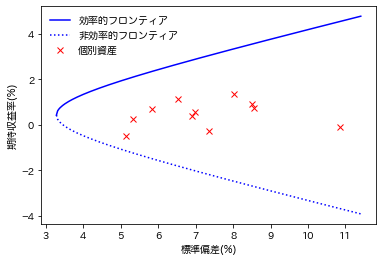

In [43]:
#%% 最小分散フロンティアの作図
sigma_gmv = 1.0 / np.sqrt(C)
sigma_p = np.linspace(sigma_gmv, 1.05 * np.max(Stdev), num=250)
mu_p_efficient = (A + np.sqrt(np.abs(C * sigma_p ** 2 - 1.0) * D)) / C
mu_p_inefficient = (A - np.sqrt(np.abs(C * sigma_p ** 2 - 1.0) * D)) / C
fig1 = plt.figure(num=1, facecolor='w')
plt.plot(sigma_p, mu_p_efficient, 'b-')
plt.plot(sigma_p, mu_p_inefficient, 'b:')
plt.plot(np.sqrt(np.diagonal(Sigma)), Mu, 'rx')
plt.legend(['効率的フロンティア', '非効率的フロンティア', '個別資産'],
           loc='best', frameon=False, prop=jpfont)
plt.xlabel('標準偏差(%)', fontproperties=jpfont)
plt.ylabel('期待収益率(%)', fontproperties=jpfont)
#plt.savefig('efficient_frontier.png', dpi=1000)
plt.show()

In [44]:
#%% 空売り制約の下での分散最小化問題の設定
Weight = cvx.Variable(Mu.shape[0])
Target_Return = cvx.Parameter(nonneg=False)
Risk_Variance = cvx.quad_form(Weight, Sigma)
Opt_Portfolio = cvx.Problem(cvx.Minimize(Risk_Variance),
                            [Weight.T @ Mu == Target_Return,
                             cvx.sum(Weight) == 1.0,
                             Weight >= 0.0])

In [45]:
#%% 空売り制約の下での最小分散フロンティアの計算
V_Target = np.linspace(Mu.min(), Mu.max(), num=250)
V_Risk = np.zeros(V_Target.shape)
V_Weight = np.zeros((V_Target.shape[0], Mu.shape[0]))
for idx, Target_Return.value in enumerate(V_Target):
    Opt_Portfolio.solve(solver=cvx.ECOS)
    V_Weight[idx, :] = Weight.value.T
    V_Risk[idx] = np.sqrt(Risk_Variance.value)

Text(0, 0.5, '期待収益率(%)')

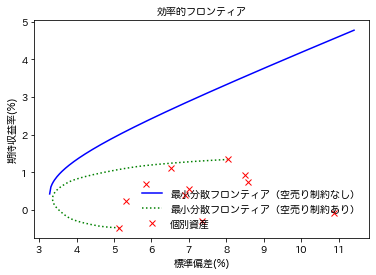

In [46]:
#%% 最小分散フロンティアの作図
sigma_gmv = 1.0 / np.sqrt(C)
sigma_p = np.linspace(sigma_gmv, 1.05 * np.max(Stdev), num=250)
mu_p_efficient = (A + np.sqrt(np.abs(C * sigma_p ** 2 - 1.0) * D)) / C
fig2 = plt.figure(num=2, facecolor='w')           
plt.plot(sigma_p, mu_p_efficient, 'b-')
plt.plot(V_Risk, V_Target, 'g:')
plt.plot(np.sqrt(np.diagonal(Sigma)), Mu, 'rx')
plt.legend(['最小分散フロンティア（空売り制約なし）',
            '最小分散フロンティア（空売り制約あり）',
            '個別資産'],
           loc='best', frameon=False, prop=jpfont)
plt.title('効率的フロンティア', fontproperties=jpfont)
plt.xlabel('標準偏差(%)', fontproperties=jpfont)
plt.ylabel('期待収益率(%)', fontproperties=jpfont)
#plt.savefig('efficient_frontier(空売り制約あり)_改.png', dpi=1500)

<Figure size 432x288 with 0 Axes>

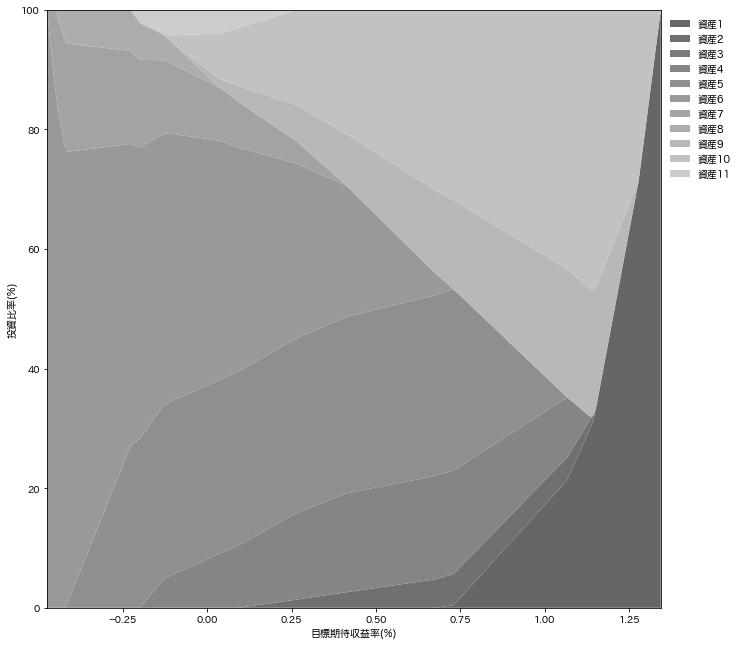

In [47]:
#   投資比率の推移の作図
fig3 = plt.figure(num=3, facecolor='w')
plt.figure(figsize=(11, 11))
plt.stackplot(V_Target, V_Weight.T*100,
              colors=tuple([tuple(gray*np.ones(3))
                            for gray in np.linspace(0.4, 0.8, num=Mu.shape[0])
                            ]))
plt.axis([Mu.min(), Mu.max(), 0.0, 100.0])
plt.legend(['資産1', '資産2', '資産3', '資産4', '資産5', '資産6', '資産7', '資産8', '資産9', '資産10', '資産11', '資産12', '資産13', '資産14', '資産15', '資産16', '資産17', '資産18', '資産19', '資産20', '資産21', '資産22', '資産23', '資産24', '資産25', '資産26', '資産27', '資産28', '資産29', '資産30', '資産31', '資産32', '資産33', '資産34', '資産35', '資産36', '資産37', '資産38', '資産39', '資産40', '資産41', '資産42', '資産43', '資産44', '資産45', '資産46', '資産47', '資産48', '資産49', '資産50', '資産51', '資産52', '資産53', '資産54', '資産55', '資産56', '資産57'],
           loc='upper left', bbox_to_anchor=(1.0, 1.0),
           frameon=False, prop=jpfont)
plt.xlabel('目標期待収益率(%)', fontproperties=jpfont)
plt.ylabel('投資比率(%)', fontproperties=jpfont)
#plt.savefig('投資割合.png', dpi=1000)
plt.show()

In [48]:
#
# 最適ポートフォリオの決定
#

umax=0
for i in range(len(V_Weight)):
    if V_Target[i] <= 0:
        u=((math.log(-1 * V_Target[i]))+(-1 * math.log(18-V_Risk[i])))*100
        if u>umax:
            umax=u
            maxi=i
        print('(',i,') 目標収益率=%.3f リスク=%.3f 効用=%.3f'
              %(V_Target[i],V_Risk[i],u))
        print('ポートフォリオ=%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f'#,%.3f,%.3f,%.3f,%.3f'
              %(V_Weight[i][0],V_Weight[i][1],V_Weight[i][2],V_Weight[i][3],V_Weight[i][4],V_Weight[i][5],V_Weight[i][6],V_Weight[i][7],V_Weight[i][8],V_Weight[i][9],V_Weight[i][10]))#,V_Weight[i][11],V_Weight[i][12],V_Weight[i][13],V_Weight[i][14]))
        
    else:
        u=(math.log(V_Target[i])+math.log(18-V_Risk[i]))*100
        if u>umax:
            umax=u
            maxi=i
        print('(',i,') 目標収益率=%.3f リスク=%.3f 効用=%.3f'
              %(V_Target[i],V_Risk[i],u))
        print('ポートフォリオ=%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f'#,%.3f,%.3f,%.3f,%.3f'
              %(V_Weight[i][0],V_Weight[i][1],V_Weight[i][2],V_Weight[i][3],V_Weight[i][4],V_Weight[i][5],V_Weight[i][6],V_Weight[i][7],V_Weight[i][8],V_Weight[i][9],V_Weight[i][10]))#,V_Weight[i][11],V_Weight[i][12],V_Weight[i][13],V_Weight[i][14]))
print('\n効用の最大値（',maxi,'）',np.round(umax,3))

( 0 ) 目標収益率=-0.474 リスク=5.145 効用=-329.996
ポートフォリオ=-0.000,-0.000,-0.000,-0.000,0.000,1.000,0.000,0.000,-0.000,-0.000,-0.000
( 1 ) 目標収益率=-0.467 リスク=5.018 効用=-332.526
ポートフォリオ=-0.000,-0.000,-0.000,-0.000,-0.000,0.960,0.040,0.000,-0.000,-0.000,-0.000
( 2 ) 目標収益率=-0.460 リスク=4.909 効用=-334.938
ポートフォリオ=0.000,0.000,0.000,0.000,0.000,0.919,0.081,0.000,0.000,0.000,0.000
( 3 ) 目標収益率=-0.452 リスク=4.819 効用=-337.228
ポートフォリオ=0.000,0.000,0.000,0.000,0.000,0.879,0.121,0.000,0.000,0.000,0.000
( 4 ) 目標収益率=-0.445 リスク=4.746 効用=-339.402
ポートフォリオ=0.000,0.000,0.000,0.000,0.000,0.846,0.147,0.007,0.000,0.000,0.000
( 5 ) 目標収益率=-0.438 リスク=4.683 効用=-341.531
ポートフォリオ=0.000,0.000,0.000,0.000,0.000,0.823,0.157,0.021,0.000,0.000,0.000
( 6 ) 目標収益率=-0.430 リスク=4.628 効用=-343.626
ポートフォリオ=-0.000,-0.000,-0.000,-0.000,-0.000,0.799,0.167,0.035,-0.000,-0.000,-0.000
( 7 ) 目標収益率=-0.423 リスク=4.581 効用=-345.687
ポートフォリオ=0.000,0.000,0.000,0.000,0.000,0.775,0.176,0.049,0.000,0.000,0.000
( 8 ) 目標収益率=-0.416 リスク=4.542 効用=-347.721
ポートフォリオ=0.000,0.

# 3回目

In [49]:
Asset_Weight_tmp = []

for i in range(11):
    Asset_Weight_tmp.append(round(V_Weight[229][i], 3))

In [50]:
sum(Asset_Weight_tmp)

1.0

In [51]:
Asset_Weight_tmp

[0.472, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.129, 0.399, 0.0]

In [52]:
data_column = marketcap.columns.tolist()

In [53]:
data_column

['デンソー',
 '三菱総合研究所',
 '大日本印刷',
 '京セラ',
 'ＫＤＤＩ',
 'ローソン',
 '東洋紡',
 'コニカミノルタ',
 'ヤマト',
 '三菱商事',
 '三菱電機']

In [54]:
for i in range(11):
    if not(Asset_Weight_tmp[i] == 0):
        del marketcap[data_column[i]]

In [55]:
marketcap

三菱総合研究所  大日本印刷   京セラ  ＫＤＤＩ  ローソン   東洋紡  コニカミノルタ  三菱電機
0      3180   2308  4891  3145  7910  1950      836  1218
1      3125   2104  4916  3036  7260  1640      932  1351
2      3170   1972  4823  3115  7970  1690      850  1283
3      3335   2108  5110  3192  7980  1720      941  1423
4      3240   2164  5436  2999  7920  1720     1092  1577
..      ...    ...   ...   ...   ...   ...      ...   ...
56     4120   2319  7025  3395  5430  1424      600  1687
57     4120   2171  6637  3306  4900  1322      618  1682
58     3900   2359  6722  3717  4930  1352      598  1692
59     3945   2349  6868  3465  5140  1333      614  1613
60     3985   2566  6737  3332  5490  1384      560  1476

[61 rows x 8 columns]

In [56]:
R = (marketcap.diff()/marketcap.shift(1))[1:]*100

In [57]:
R

三菱総合研究所      大日本印刷        京セラ       ＫＤＤＩ       ローソン        東洋紡  \
1   -1.729560  -8.838821   0.511143  -3.465819  -8.217446 -15.897436   
2    1.440000  -6.273764  -1.891782   2.602108   9.779614   3.048780   
3    5.205047   6.896552   5.950653   2.471910   0.125471   1.775148   
4   -2.848576   2.656546   6.379648  -6.046366  -0.751880   0.000000   
5    1.543210   6.746765   6.916851  -1.300433   3.661616   1.162791   
6   -0.759878  -0.519481   1.238816   2.364865   0.365408   5.172414   
7   -2.756508   6.353351   4.996601  -3.003300  -5.946602   6.557377   
8    1.574803  -1.800327   0.388475  -0.578428  -2.580645  -1.025641   
9    0.155039   3.333333   1.741374   1.163587  -1.986755   2.072539   
10  -3.715170  -0.725806   1.125198   3.721245   2.027027  -1.015228   
11   4.823151   1.380991   1.958941  -2.968037   4.105960   5.641026   
12  -2.760736  -2.483974   3.166308  -1.848739  -4.452926   1.941748   
13  -0.946372   6.655711  -1.668653   1.609589  -1.597870  -5.238095   
14   5.573248   3.736518   5.787879   0.000000   0.811908   7.688442   
15   1.508296   0.445600   8.034947   1.921132  -0.671141   1.679888   
16  11.738484  -9.242144   4.746122   6.316138   4.594595  -6.057825   
17   5.053191   2.362525  -6.682698 -12.752722  -3.229974   0.000000   
18  -6.202532  -3.302825  -1.654686  -1.853832  -1.468625   1.465559   
19  -6.072874  -7.366255 -12.384499  -4.249909  -5.284553   1.444391   
20  -3.591954  -2.354509  -5.493468   3.072838   3.719599  -0.379687   
21  14.307004   7.279345  16.555630   8.097166  -0.275862   1.667461   
22  27.118644  -0.678541  -7.745070   0.306435  -1.936376 -15.229616   
23   4.000000   5.849701  -3.237299   2.885268  -2.397743   1.879491   
24 -14.990138  -1.694232   3.857852   2.705378  -3.034682   2.441671   
25  -1.972158   2.297907   8.045623  -5.525217  -2.831595   7.415254   
26   3.668639   5.976735  -2.710414   6.732404   6.134969  -4.930966   
27 -19.634703  -4.049962 -10.000000 -10.321759   3.179191 -16.701245   
28   9.659091   3.589744  -0.211795  -5.364121   4.061625   2.303861   
29 -18.264249 -12.528561 -10.073469  -1.501502  -6.460296  -8.764455   
30   0.792393   9.534175  11.002179   3.772866  -3.453237   7.671781   
31   2.358491   2.464229   0.441609  -1.248623   0.596125  -2.168525   
32   2.764977   2.676493   5.845953 -11.305318  -9.037037 -10.386320   
33  -7.922272  -0.528901  10.615385   6.540881 -15.472313   2.544170   
34   5.032468 -10.558299  -7.872045   9.759937  -2.312139 -19.090283   
35   3.863988  -2.505308   6.204710  -1.613482   1.972387   9.540034   
36  19.047619  -0.087108  -4.904051   4.008746   5.415861   5.987558   
37  -9.750000   0.217960  -5.605381  -0.665732  -3.302752  -0.733676   
38  -0.692521  21.400609   6.175772  -0.352734   4.933586   4.730229   
39   7.391911   4.192046   6.517524   6.159292   8.137432   3.810868   
40   8.441558   0.653370   4.270512   4.668223  -0.334448   8.701564   
41   3.592814   1.127434   0.443131   3.631730   3.859060   4.190119   
42   0.115607   2.871622  -2.754011   0.553335   2.423263  -9.003601   
43 -12.933025 -14.778325  -6.571350  -6.511770  -9.621451 -10.488127   
44 -12.732095 -11.329480  -5.709241   4.316547   3.490401 -15.770081   
45  10.790274  -0.478053  -9.815855  -2.539185  -6.070826  10.936133   
46  13.717421   6.943231   0.899810   0.868446   7.001795  19.006309   
47   3.860072   0.816660   0.583090   3.125000  -9.228188  -0.596421   
48  -2.439024  -7.087890  -0.358056   0.773036  -2.957486  -2.800000   
49  -6.666667  -1.743679   4.158111  -5.553851  -0.380952   4.801097   
50  13.010204  -5.678793  -1.478561 -13.710201  -4.015296  -5.301047   
51 -14.672686  -8.795861  -4.435551   5.158133  -4.282869  -4.284727   
52  10.052910   0.876741   4.048159   6.802721  -1.560874  -5.776173   
53   2.764423  -5.163599   6.087540   2.782434   1.585624   5.747126   
54  -1.637427  -2.964960   5.896301   0.424005   5.723205  -5.144928   
55  -4.518430   6.333333   2.373489   6.852874

In [58]:
#%% 最小分散ポートフォリオの計算
Mu = R.mean().values
Stdev = R.std().values
CorrMatrix = R.corr().values
Sigma = np.diag(Stdev) @ CorrMatrix @ np.diag(Stdev)
iota = np.ones(Mu.shape)

In [59]:
inv_Sigma = lin.inv(Sigma)
A = Mu @ inv_Sigma @ iota
B = Mu @ inv_Sigma @ Mu
C = iota @ inv_Sigma @ iota
D = B * C - A ** 2
V_Target = np.linspace(Mu.min(), Mu.max(), num=5)
V_Risk = np.zeros(V_Target.shape)
V_Weight = np.zeros((V_Target.shape[0], Mu.shape[0]))
for idx, Target_Return in enumerate(V_Target):
    V_Weight[idx, :] = (C * Target_Return - A) / D * lin.solve(Sigma, Mu) \
                       + (B - A * Target_Return) / D * lin.solve(Sigma, iota)
    V_Risk[idx] = (C / D) * (Target_Return - A / C) ** 2 + 1.0 / C

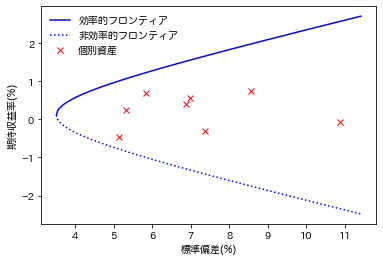

In [60]:
#%% 最小分散フロンティアの作図
sigma_gmv = 1.0 / np.sqrt(C)
sigma_p = np.linspace(sigma_gmv, 1.05 * np.max(Stdev), num=250)
mu_p_efficient = (A + np.sqrt(np.abs(C * sigma_p ** 2 - 1.0) * D)) / C
mu_p_inefficient = (A - np.sqrt(np.abs(C * sigma_p ** 2 - 1.0) * D)) / C
fig1 = plt.figure(num=1, facecolor='w')
plt.plot(sigma_p, mu_p_efficient, 'b-')
plt.plot(sigma_p, mu_p_inefficient, 'b:')
plt.plot(np.sqrt(np.diagonal(Sigma)), Mu, 'rx')
plt.legend(['効率的フロンティア', '非効率的フロンティア', '個別資産'],
           loc='best', frameon=False, prop=jpfont)
plt.xlabel('標準偏差(%)', fontproperties=jpfont)
plt.ylabel('期待収益率(%)', fontproperties=jpfont)
#plt.savefig('efficient_frontier.png', dpi=1000)
plt.show()

In [61]:
#%% 空売り制約の下での分散最小化問題の設定
Weight = cvx.Variable(Mu.shape[0])
Target_Return = cvx.Parameter(nonneg=False)
Risk_Variance = cvx.quad_form(Weight, Sigma)
Opt_Portfolio = cvx.Problem(cvx.Minimize(Risk_Variance),
                            [Weight.T @ Mu == Target_Return,
                             cvx.sum(Weight) == 1.0,
                             Weight >= 0.0])

In [62]:
#%% 空売り制約の下での最小分散フロンティアの計算
V_Target = np.linspace(Mu.min(), Mu.max(), num=250)
V_Risk = np.zeros(V_Target.shape)
V_Weight = np.zeros((V_Target.shape[0], Mu.shape[0]))
for idx, Target_Return.value in enumerate(V_Target):
    Opt_Portfolio.solve(solver=cvx.ECOS)
    V_Weight[idx, :] = Weight.value.T
    V_Risk[idx] = np.sqrt(Risk_Variance.value)

In [63]:
#%% 最小分散フロンティアの作図
sigma_gmv = 1.0 / np.sqrt(C)
sigma_p = np.linspace(sigma_gmv, 1.05 * np.max(Stdev), num=250)
mu_p_efficient = (A + np.sqrt(np.abs(C * sigma_p ** 2 - 1.0) * D)) / C
fig2 = plt.figure(num=2, facecolor='w')           
plt.plot(sigma_p, mu_p_efficient, 'b-')
plt.plot(V_Risk, V_Target, 'g:')
plt.plot(np.sqrt(np.diagonal(Sigma)), Mu, 'rx')
plt.legend(['最小分散フロンティア（空売り制約なし）',
            '最小分散フロンティア（空売り制約あり）',
            '個別資産'],
           loc='best', frameon=False, prop=jpfont)
plt.title('効率的フロンティア', fontproperties=jpfont)
plt.xlabel('標準偏差(%)', fontproperties=jpfont)
plt.ylabel('期待収益率(%)', fontproperties=jpfont)
#plt.savefig('efficient_frontier(空売り制約あり)_改.png', dpi=1500)

Text(0, 0.5, '期待収益率(%)')

In [64]:
#   投資比率の推移の作図
fig3 = plt.figure(num=3, facecolor='w')
plt.figure(figsize=(11, 11))
plt.stackplot(V_Target, V_Weight.T*100,
              colors=tuple([tuple(gray*np.ones(3))
                            for gray in np.linspace(0.4, 0.8, num=Mu.shape[0])
                            ]))
plt.axis([Mu.min(), Mu.max(), 0.0, 100.0])
plt.legend(['資産1', '資産2', '資産3', '資産4', '資産5', '資産6', '資産7', '資産8', '資産9', '資産10', '資産11', '資産12', '資産13', '資産14', '資産15', '資産16', '資産17', '資産18', '資産19', '資産20', '資産21', '資産22', '資産23', '資産24', '資産25', '資産26', '資産27', '資産28', '資産29', '資産30', '資産31', '資産32', '資産33', '資産34', '資産35', '資産36', '資産37', '資産38', '資産39', '資産40', '資産41', '資産42', '資産43', '資産44', '資産45', '資産46', '資産47', '資産48', '資産49', '資産50', '資産51', '資産52', '資産53', '資産54', '資産55', '資産56', '資産57'],
           loc='upper left', bbox_to_anchor=(1.0, 1.0),
           frameon=False, prop=jpfont)
plt.xlabel('目標期待収益率(%)', fontproperties=jpfont)
plt.ylabel('投資比率(%)', fontproperties=jpfont)
#plt.savefig('投資割合.png', dpi=1000)
plt.show()

<Figure size 432x288 with 0 Axes>

In [65]:
#
# 最適ポートフォリオの決定
#

umax=0
for i in range(len(V_Weight)):
    if V_Target[i] <= 0:
        u=0#((math.log(-1 * V_Target[i]))+(-1 * math.log(18-V_Risk[i])))*100
        if u>umax:
            umax=u
            maxi=i
        print('(',i,') 目標収益率=%.3f リスク=%.3f 効用=%.3f'
              %(V_Target[i],V_Risk[i],u))
        print('ポートフォリオ=%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f'#,%.3f,%.3f,%.3f'#,%.3f,%.3f,%.3f,%.3f'
              %(V_Weight[i][0],V_Weight[i][1],V_Weight[i][2],V_Weight[i][3],V_Weight[i][4],V_Weight[i][5],V_Weight[i][6],V_Weight[i][7]))#,V_Weight[i][8],V_Weight[i][9],V_Weight[i][10]))#,V_Weight[i][11],V_Weight[i][12],V_Weight[i][13],V_Weight[i][14]))
        
    else:
        u=(math.log(V_Target[i])+math.log(20-V_Risk[i]))*100
        if u>umax:
            umax=u
            maxi=i
        print('(',i,') 目標収益率=%.3f リスク=%.3f 効用=%.3f'
              %(V_Target[i],V_Risk[i],u))
        print('ポートフォリオ=%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f'#,%.3f,%.3f,%.3f'#,%.3f,%.3f,%.3f,%.3f'
              %(V_Weight[i][0],V_Weight[i][1],V_Weight[i][2],V_Weight[i][3],V_Weight[i][4],V_Weight[i][5],V_Weight[i][6],V_Weight[i][7]))#,V_Weight[i][8],V_Weight[i][9],V_Weight[i][10]))#,V_Weight[i][11],V_Weight[i][12],V_Weight[i][13],V_Weight[i][14]))
print('\n効用の最大値（',maxi,'）',np.round(umax,3))

( 0 ) 目標収益率=-0.474 リスク=5.145 効用=0.000
ポートフォリオ=-0.000,-0.000,-0.000,-0.000,1.000,0.000,-0.000,-0.000
( 1 ) 目標収益率=-0.469 リスク=5.059 効用=0.000
ポートフォリオ=-0.000,-0.000,-0.000,-0.000,0.973,0.027,0.000,-0.000
( 2 ) 目標収益率=-0.464 リスク=4.980 効用=0.000
ポートフォリオ=0.000,0.000,0.000,0.000,0.946,0.054,0.000,0.000
( 3 ) 目標収益率=-0.460 リスク=4.909 効用=0.000
ポートフォリオ=-0.000,-0.000,-0.000,-0.000,0.919,0.081,0.000,-0.000
( 4 ) 目標収益率=-0.455 リスク=4.847 効用=0.000
ポートフォリオ=-0.000,0.000,-0.000,0.000,0.892,0.108,0.000,0.000
( 5 ) 目標収益率=-0.450 リスク=4.793 効用=0.000
ポートフォリオ=0.000,0.000,0.000,0.000,0.866,0.134,0.000,0.000
( 6 ) 目標収益率=-0.445 リスク=4.747 効用=0.000
ポートフォリオ=-0.000,-0.000,-0.000,-0.000,0.846,0.147,0.007,-0.000
( 7 ) 目標収益率=-0.440 リスク=4.704 効用=0.000
ポートフォリオ=0.000,0.000,0.000,0.000,0.831,0.153,0.016,0.000
( 8 ) 目標収益率=-0.435 リスク=4.664 効用=0.000
ポートフォリオ=0.000,0.000,0.000,0.000,0.815,0.160,0.025,0.000
( 9 ) 目標収益率=-0.430 リスク=4.628 効用=0.000
ポートフォリオ=0.000,0.000,0.000,0.000,0.799,0.167,0.035,0.000
( 10 ) 目標収益率=-0.426 リスク=4.596 効用=0.00

# 4回目

In [66]:
Asset_Weight_tmp = []

for i in range(8):
    Asset_Weight_tmp.append(round(V_Weight[244][i], 3))

In [67]:
sum(Asset_Weight_tmp)

0.9999999999999999

In [68]:
Asset_Weight_tmp

[0.296, 0.0, 0.703, 0.001, 0.0, 0.0, 0.0, 0.0]

In [69]:
data_column = marketcap.columns.tolist()

In [70]:
data_column

['三菱総合研究所', '大日本印刷', '京セラ', 'ＫＤＤＩ', 'ローソン', '東洋紡', 'コニカミノルタ', '三菱電機']

In [71]:
for i in range(8):
    if not(Asset_Weight_tmp[i] <= 0.005):
        del marketcap[data_column[i]]

In [72]:
marketcap

大日本印刷  ＫＤＤＩ  ローソン   東洋紡  コニカミノルタ  三菱電機
0    2308  3145  7910  1950      836  1218
1    2104  3036  7260  1640      932  1351
2    1972  3115  7970  1690      850  1283
3    2108  3192  7980  1720      941  1423
4    2164  2999  7920  1720     1092  1577
..    ...   ...   ...   ...      ...   ...
56   2319  3395  5430  1424      600  1687
57   2171  3306  4900  1322      618  1682
58   2359  3717  4930  1352      598  1692
59   2349  3465  5140  1333      614  1613
60   2566  3332  5490  1384      560  1476

[61 rows x 6 columns]

In [73]:
R = (marketcap.diff()/marketcap.shift(1))[1:]*100

In [74]:
R

大日本印刷       ＫＤＤＩ       ローソン        東洋紡    コニカミノルタ       三菱電機
1   -8.838821  -3.465819  -8.217446 -15.897436  11.483254  10.919540
2   -6.273764   2.602108   9.779614   3.048780  -8.798283  -5.033309
3    6.896552   2.471910   0.125471   1.775148  10.705882  10.911925
4    2.656546  -6.046366  -0.751880   0.000000  16.046759  10.822207
5    6.746765  -1.300433   3.661616   1.162791   6.318681   3.360812
6   -0.519481   2.364865   0.365408   5.172414   0.947459   5.644172
7    6.353351  -3.003300  -5.946602   6.557377  -7.593857  -4.297329
8   -1.800327  -0.578428  -2.580645  -1.025641  -8.033241  -3.094660
9    3.333333   1.163587  -1.986755   2.072539  -1.104418  -2.692549
10  -0.725806   3.721245   2.027027  -1.015228 -11.573604  -1.737452
11   1.380991  -2.968037   4.105960   5.641026   7.003444   5.828422
12  -2.483974  -1.848739  -4.452926   1.941748  -1.931330   5.878713
13   6.655711   1.609589  -1.597870  -5.238095  -3.938731  -4.909410
14   3.736518   0.000000   0.811908   7.688442   5.239180   8.051629
15   0.445600   1.921132  -0.671141   1.679888   6.926407   9.897611
16  -9.242144   6.316138   4.594595  -6.057825  10.931174  -4.089027
17   2.362525 -12.752722  -3.229974   0.000000  -1.094891   1.025364
18  -3.302825  -1.853832  -1.468625   1.465559   0.184502   6.463675
19  -7.366255  -4.249909  -5.284553   1.444391  -8.747698  -8.830908
20  -2.354509   3.072838   3.719599  -0.379687  -7.971746  -6.329114
21   7.279345   8.097166  -0.275862   1.667461   3.070175  -1.233843
22  -0.678541   0.306435  -1.936376 -15.229616   5.744681  -8.090422
23   5.849701   2.885268  -2.397743   1.879491   3.521127  -4.530744
24  -1.694232   2.705378  -3.034682   2.441671  -2.721088   2.508475
25   2.297907  -5.525217  -2.831595   7.415254  12.987013  -0.793651
26   5.976735   6.732404   6.134969  -4.930966   6.808134   3.800000
27  -4.049962 -10.321759   3.179191 -16.701245  -7.201987  -7.899807
28   3.589744  -5.364121   4.061625   2.303861  -8.831401   4.463040
29 -12.528561  -1.501502  -6.460296  -8.764455  -2.837573 -18.758344
30   9.534175   3.772866  -3.453237   7.671781  10.070493  12.243221
31   2.464229  -1.248623   0.596125  -2.168525  -1.189387   2.049780
32   2.676493 -11.305318  -9.037037 -10.386320   0.833333   2.080344
33  -0.528901   6.540881 -15.472313   2.544170   2.295684  11.173577
34 -10.558299   9.759937  -2.312139 -19.090283 -14.003591 -13.969659
35  -2.505308  -1.613482   1.972387   9.540034   9.498956   4.261572
36  -0.087108   4.008746   5.415861   5.987558 -13.250715   0.986610
37   0.217960  -0.665732  -3.302752  -0.733676 -16.923077 -10.397767
38  21.400609  -0.352734   4.933586   4.730229  -0.529101  11.604361
39   4.192046   6.159292   8.137432   3.810868   6.250000   8.653175
40   0.653370   4.668223  -0.334448   8.701564 -10.262829  -2.890173
41   1.127434   3.631730   3.859060   4.190119  -0.557880  -0.859788
42   2.871622   0.553335   2.423263  -9.003601  -4.628331   3.068712
43 -14.778325  -6.511770  -9.621451 -10.488127 -13.823529 -11.262136
44 -11.329480   4.316547   3.490401 -15.770081 -25.085324  -2.625821
45  -0.478053  -2.539185  -6.070826  10.936133  -4.100228   0.449438
46   6.943231   0.868446   7.001795  19.006309  -5.225653   5.816555
47   0.816660   3.125000  -9.228188  -0.596421  -6.766917  -1.338971
48  -7.087890   0.773036  -2.957486  -2.800000 -25.268817  -2.071429
49  -1.743679  -5.553851  -0.380952   4.801097  23.381295   6.710430
50  -5.678793 -13.710201  -4.015296  -5.301047 -13.702624  -2.802461
51  -8.795861   5.158133  -4.282869  -4.284727 -10.810811  -5.766526
52   0.876741   6.802721  -1.560874  -5.776173  26.515152  14.477612
53  -5.163599   2.782434   1.585624   5.747126  17.964072   1.499348
54  -2.964960   0.424005   5.723205  -5.144928  14.974619   2.440591
55   6.333333   6.852874  -2.066929   2.521008  18.984547  -1.630094
56  21.159875   3.191489   9.145729   6.110283  11.317254   7.520714
57  -6.382061  -2.621502  -9.760589  -7.162921   3.000000  -0.296384
58   8

In [75]:
#%% 最小分散ポートフォリオの計算
Mu = R.mean().values
Stdev = R.std().values
CorrMatrix = R.corr().values
Sigma = np.diag(Stdev) @ CorrMatrix @ np.diag(Stdev)
iota = np.ones(Mu.shape)

In [76]:
inv_Sigma = lin.inv(Sigma)
A = Mu @ inv_Sigma @ iota
B = Mu @ inv_Sigma @ Mu
C = iota @ inv_Sigma @ iota
D = B * C - A ** 2
V_Target = np.linspace(Mu.min(), Mu.max(), num=5)
V_Risk = np.zeros(V_Target.shape)
V_Weight = np.zeros((V_Target.shape[0], Mu.shape[0]))
for idx, Target_Return in enumerate(V_Target):
    V_Weight[idx, :] = (C * Target_Return - A) / D * lin.solve(Sigma, Mu) \
                       + (B - A * Target_Return) / D * lin.solve(Sigma, iota)
    V_Risk[idx] = (C / D) * (Target_Return - A / C) ** 2 + 1.0 / C

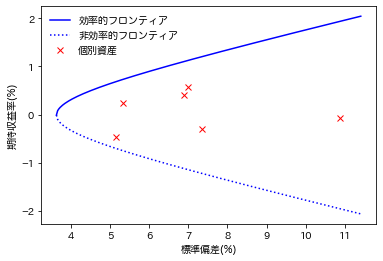

In [77]:
#%% 最小分散フロンティアの作図
sigma_gmv = 1.0 / np.sqrt(C)
sigma_p = np.linspace(sigma_gmv, 1.05 * np.max(Stdev), num=250)
mu_p_efficient = (A + np.sqrt(np.abs(C * sigma_p ** 2 - 1.0) * D)) / C
mu_p_inefficient = (A - np.sqrt(np.abs(C * sigma_p ** 2 - 1.0) * D)) / C
fig1 = plt.figure(num=1, facecolor='w')
plt.plot(sigma_p, mu_p_efficient, 'b-')
plt.plot(sigma_p, mu_p_inefficient, 'b:')
plt.plot(np.sqrt(np.diagonal(Sigma)), Mu, 'rx')
plt.legend(['効率的フロンティア', '非効率的フロンティア', '個別資産'],
           loc='best', frameon=False, prop=jpfont)
plt.xlabel('標準偏差(%)', fontproperties=jpfont)
plt.ylabel('期待収益率(%)', fontproperties=jpfont)
#plt.savefig('efficient_frontier.png', dpi=1000)
plt.show()

In [78]:
#%% 空売り制約の下での分散最小化問題の設定
Weight = cvx.Variable(Mu.shape[0])
Target_Return = cvx.Parameter(nonneg=False)
Risk_Variance = cvx.quad_form(Weight, Sigma)
Opt_Portfolio = cvx.Problem(cvx.Minimize(Risk_Variance),
                            [Weight.T @ Mu == Target_Return,
                             cvx.sum(Weight) == 1.0,
                             Weight >= 0.0])

In [79]:
#%% 空売り制約の下での最小分散フロンティアの計算
V_Target = np.linspace(Mu.min(), Mu.max(), num=250)
V_Risk = np.zeros(V_Target.shape)
V_Weight = np.zeros((V_Target.shape[0], Mu.shape[0]))
for idx, Target_Return.value in enumerate(V_Target):
    Opt_Portfolio.solve(solver=cvx.ECOS)
    V_Weight[idx, :] = Weight.value.T
    V_Risk[idx] = np.sqrt(Risk_Variance.value)

Text(0, 0.5, '期待収益率(%)')

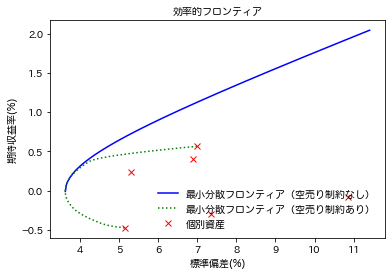

In [80]:
#%% 最小分散フロンティアの作図
sigma_gmv = 1.0 / np.sqrt(C)
sigma_p = np.linspace(sigma_gmv, 1.05 * np.max(Stdev), num=250)
mu_p_efficient = (A + np.sqrt(np.abs(C * sigma_p ** 2 - 1.0) * D)) / C
fig2 = plt.figure(num=2, facecolor='w')           
plt.plot(sigma_p, mu_p_efficient, 'b-')
plt.plot(V_Risk, V_Target, 'g:')
plt.plot(np.sqrt(np.diagonal(Sigma)), Mu, 'rx')
plt.legend(['最小分散フロンティア（空売り制約なし）',
            '最小分散フロンティア（空売り制約あり）',
            '個別資産'],
           loc='best', frameon=False, prop=jpfont)
plt.title('効率的フロンティア', fontproperties=jpfont)
plt.xlabel('標準偏差(%)', fontproperties=jpfont)
plt.ylabel('期待収益率(%)', fontproperties=jpfont)
#plt.savefig('efficient_frontier(空売り制約あり)_改.png', dpi=1500)

In [81]:
#   投資比率の推移の作図
fig3 = plt.figure(num=3, facecolor='w')
plt.figure(figsize=(11, 11))
plt.stackplot(V_Target, V_Weight.T*100,
              colors=tuple([tuple(gray*np.ones(3))
                            for gray in np.linspace(0.4, 0.8, num=Mu.shape[0])
                            ]))
plt.axis([Mu.min(), Mu.max(), 0.0, 100.0])
plt.legend(['資産1', '資産2', '資産3', '資産4', '資産5', '資産6', '資産7', '資産8', '資産9', '資産10', '資産11', '資産12', '資産13', '資産14', '資産15', '資産16', '資産17', '資産18', '資産19', '資産20', '資産21', '資産22', '資産23', '資産24', '資産25', '資産26', '資産27', '資産28', '資産29', '資産30', '資産31', '資産32', '資産33', '資産34', '資産35', '資産36', '資産37', '資産38', '資産39', '資産40', '資産41', '資産42', '資産43', '資産44', '資産45', '資産46', '資産47', '資産48', '資産49', '資産50', '資産51', '資産52', '資産53', '資産54', '資産55', '資産56', '資産57'],
           loc='upper left', bbox_to_anchor=(1.0, 1.0),
           frameon=False, prop=jpfont)
plt.xlabel('目標期待収益率(%)', fontproperties=jpfont)
plt.ylabel('投資比率(%)', fontproperties=jpfont)
#plt.savefig('投資割合.png', dpi=1000)
plt.show()

<Figure size 432x288 with 0 Axes>

In [82]:
#
# 最適ポートフォリオの決定
#

umax=0
for i in range(len(V_Weight)):
    if V_Target[i] <= 0:
        u=((math.log(-1 * V_Target[i]))+(-1 * math.log(18-V_Risk[i])))*100
        if u>umax:
            umax=u
            maxi=i
        print('(',i,') 目標収益率=%.3f リスク=%.3f 効用=%.3f'
              %(V_Target[i],V_Risk[i],u))
        print('ポートフォリオ=%.3f,%.3f,%.3f,%.3f,%.3f,%.3f'#,%.3f,%.3f,%.3f,%.3f,%.3f'#,%.3f,%.3f,%.3f,%.3f'
              %(V_Weight[i][0],V_Weight[i][1],V_Weight[i][2],V_Weight[i][3],V_Weight[i][4],V_Weight[i][5]))#,V_Weight[i][6],V_Weight[i][7],V_Weight[i][8],V_Weight[i][9],V_Weight[i][10]))#,V_Weight[i][11],V_Weight[i][12],V_Weight[i][13],V_Weight[i][14]))
        
    else:
        u=(math.log(V_Target[i])+math.log(18-V_Risk[i]))*100
        if u>umax:
            umax=u
            maxi=i
        print('(',i,') 目標収益率=%.3f リスク=%.3f 効用=%.3f'
              %(V_Target[i],V_Risk[i],u))
        print('ポートフォリオ=%.3f,%.3f,%.3f,%.3f,%.3f,%.3f'#,%.3f,%.3f,%.3f,%.3f,%.3f'#,%.3f,%.3f,%.3f,%.3f'
              %(V_Weight[i][0],V_Weight[i][1],V_Weight[i][2],V_Weight[i][3],V_Weight[i][4],V_Weight[i][5]))#,V_Weight[i][6],V_Weight[i][7],V_Weight[i][8],V_Weight[i][9],V_Weight[i][10]))#,V_Weight[i][11],V_Weight[i][12],V_Weight[i][13],V_Weight[i][14]))
print('\n効用の最大値（',maxi,'）',np.round(umax,3))

( 0 ) 目標収益率=-0.474 リスク=5.145 効用=-329.996
ポートフォリオ=-0.000,0.000,1.000,0.000,-0.000,-0.000
( 1 ) 目標収益率=-0.470 リスク=5.071 効用=-331.454
ポートフォリオ=0.000,0.000,0.977,0.023,0.000,0.000
( 2 ) 目標収益率=-0.466 リスク=5.002 効用=-332.875
ポートフォリオ=-0.000,-0.000,0.954,0.046,0.000,-0.000
( 3 ) 目標収益率=-0.462 リスク=4.939 効用=-334.258
ポートフォリオ=-0.000,0.000,0.931,0.069,0.000,-0.000
( 4 ) 目標収益率=-0.457 リスク=4.882 効用=-335.601
ポートフォリオ=-0.000,-0.000,0.908,0.092,0.000,-0.000
( 5 ) 目標収益率=-0.453 リスク=4.831 効用=-336.903
ポートフォリオ=0.000,0.000,0.885,0.115,0.000,0.000
( 6 ) 目標収益率=-0.449 リスク=4.786 効用=-338.165
ポートフォリオ=0.000,0.000,0.862,0.138,0.000,0.000
( 7 ) 目標収益率=-0.445 リスク=4.747 効用=-339.396
ポートフォリオ=-0.000,0.000,0.847,0.147,0.007,-0.000
( 8 ) 目標収益率=-0.441 リスク=4.710 効用=-340.615
ポートフォリオ=-0.000,0.000,0.833,0.152,0.015,-0.000
( 9 ) 目標収益率=-0.437 リスク=4.675 効用=-341.824
ポートフォリオ=-0.000,0.000,0.819,0.158,0.023,-0.000
( 10 ) 目標収益率=-0.432 リスク=4.643 効用=-343.022
ポートフォリオ=-0.000,0.000,0.806,0.164,0.031,-0.000
( 11 ) 目標収益率=-0.428 リスク=4.614 効用=-344.209
ポート

# 5回目

In [83]:
Asset_Weight_tmp = []

for i in range(6):
    Asset_Weight_tmp.append(round(V_Weight[245][i], 3))

In [84]:
sum(Asset_Weight_tmp)

1.0

In [85]:
Asset_Weight_tmp

[0.106, 0.0, -0.0, -0.0, -0.0, 0.894]

In [86]:
data_column = marketcap.columns.tolist()

In [87]:
data_column

['大日本印刷', 'ＫＤＤＩ', 'ローソン', '東洋紡', 'コニカミノルタ', '三菱電機']

In [88]:
for i in range(6):
    if not(Asset_Weight_tmp[i] <= 0.005):
        del marketcap[data_column[i]]

In [89]:
marketcap

ＫＤＤＩ  ローソン   東洋紡  コニカミノルタ
0   3145  7910  1950      836
1   3036  7260  1640      932
2   3115  7970  1690      850
3   3192  7980  1720      941
4   2999  7920  1720     1092
..   ...   ...   ...      ...
56  3395  5430  1424      600
57  3306  4900  1322      618
58  3717  4930  1352      598
59  3465  5140  1333      614
60  3332  5490  1384      560

[61 rows x 4 columns]

In [90]:
R = (marketcap.diff()/marketcap.shift(1))[1:]*100

In [91]:
R

ＫＤＤＩ       ローソン        東洋紡    コニカミノルタ
1   -3.465819  -8.217446 -15.897436  11.483254
2    2.602108   9.779614   3.048780  -8.798283
3    2.471910   0.125471   1.775148  10.705882
4   -6.046366  -0.751880   0.000000  16.046759
5   -1.300433   3.661616   1.162791   6.318681
6    2.364865   0.365408   5.172414   0.947459
7   -3.003300  -5.946602   6.557377  -7.593857
8   -0.578428  -2.580645  -1.025641  -8.033241
9    1.163587  -1.986755   2.072539  -1.104418
10   3.721245   2.027027  -1.015228 -11.573604
11  -2.968037   4.105960   5.641026   7.003444
12  -1.848739  -4.452926   1.941748  -1.931330
13   1.609589  -1.597870  -5.238095  -3.938731
14   0.000000   0.811908   7.688442   5.239180
15   1.921132  -0.671141   1.679888   6.926407
16   6.316138   4.594595  -6.057825  10.931174
17 -12.752722  -3.229974   0.000000  -1.094891
18  -1.853832  -1.468625   1.465559   0.184502
19  -4.249909  -5.284553   1.444391  -8.747698
20   3.072838   3.719599  -0.379687  -7.971746
21   8.097166  -0.275862   1.667461   3.070175
22   0.306435  -1.936376 -15.229616   5.744681
23   2.885268  -2.397743   1.879491   3.521127
24   2.705378  -3.034682   2.441671  -2.721088
25  -5.525217  -2.831595   7.415254  12.987013
26   6.732404   6.134969  -4.930966   6.808134
27 -10.321759   3.179191 -16.701245  -7.201987
28  -5.364121   4.061625   2.303861  -8.831401
29  -1.501502  -6.460296  -8.764455  -2.837573
30   3.772866  -3.453237   7.671781  10.070493
31  -1.248623   0.596125  -2.168525  -1.189387
32 -11.305318  -9.037037 -10.386320   0.833333
33   6.540881 -15.472313   2.544170   2.295684
34   9.759937  -2.312139 -19.090283 -14.003591
35  -1.613482   1.972387   9.540034   9.498956
36   4.008746   5.415861   5.987558 -13.250715
37  -0.665732  -3.302752  -0.733676 -16.923077
38  -0.352734   4.933586   4.730229  -0.529101
39   6.159292   8.137432   3.810868   6.250000
40   4.668223  -0.334448   8.701564 -10.262829
41   3.631730   3.859060   4.190119  -0.557880
42   0.553335   2.423263  -9.003601  -4.628331
43  -6.511770  -9.621451 -10.488127 -13.823529
44   4.316547   3.490401 -15.770081 -25.085324
45  -2.539185  -6.070826  10.936133  -4.100228
46   0.868446   7.001795  19.006309  -5.225653
47   3.125000  -9.228188  -0.596421  -6.766917
48   0.773036  -2.957486  -2.800000 -25.268817
49  -5.553851  -0.380952   4.801097  23.381295
50 -13.710201  -4.015296  -5.301047 -13.702624
51   5.158133  -4.282869  -4.284727 -10.810811
52   6.802721  -1.560874  -5.776173  26.515152
53   2.782434   1.585624   5.747126  17.964072
54   0.424005   5.723205  -5.144928  14.974619
55   6.852874  -2.066929   2.521008  18.984547
56   3.191489   9.145729   6.110283  11.317254
57  -2.621502  -9.760589  -7.162921   3.000000
58  12.431942   0.612245   2.269289  -3.236246
59  -6.779661   4.259635  -1.405325   2.675585
60  -3.838384   6.809339   3.825956  -8.794788

In [92]:
#%% 最小分散ポートフォリオの計算
Mu = R.mean().values
Stdev = R.std().values
CorrMatrix = R.corr().values
Sigma = np.diag(Stdev) @ CorrMatrix @ np.diag(Stdev)
iota = np.ones(Mu.shape)

In [93]:
inv_Sigma = lin.inv(Sigma)
A = Mu @ inv_Sigma @ iota
B = Mu @ inv_Sigma @ Mu
C = iota @ inv_Sigma @ iota
D = B * C - A ** 2
V_Target = np.linspace(Mu.min(), Mu.max(), num=5)
V_Risk = np.zeros(V_Target.shape)
V_Weight = np.zeros((V_Target.shape[0], Mu.shape[0]))
for idx, Target_Return in enumerate(V_Target):
    V_Weight[idx, :] = (C * Target_Return - A) / D * lin.solve(Sigma, Mu) \
                       + (B - A * Target_Return) / D * lin.solve(Sigma, iota)
    V_Risk[idx] = (C / D) * (Target_Return - A / C) ** 2 + 1.0 / C

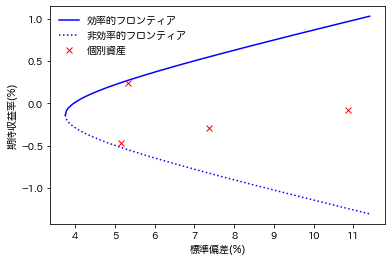

In [94]:
#%% 最小分散フロンティアの作図
sigma_gmv = 1.0 / np.sqrt(C)
sigma_p = np.linspace(sigma_gmv, 1.05 * np.max(Stdev), num=250)
mu_p_efficient = (A + np.sqrt(np.abs(C * sigma_p ** 2 - 1.0) * D)) / C
mu_p_inefficient = (A - np.sqrt(np.abs(C * sigma_p ** 2 - 1.0) * D)) / C
fig1 = plt.figure(num=1, facecolor='w')
plt.plot(sigma_p, mu_p_efficient, 'b-')
plt.plot(sigma_p, mu_p_inefficient, 'b:')
plt.plot(np.sqrt(np.diagonal(Sigma)), Mu, 'rx')
plt.legend(['効率的フロンティア', '非効率的フロンティア', '個別資産'],
           loc='best', frameon=False, prop=jpfont)
plt.xlabel('標準偏差(%)', fontproperties=jpfont)
plt.ylabel('期待収益率(%)', fontproperties=jpfont)
#plt.savefig('efficient_frontier.png', dpi=1000)
plt.show()

In [95]:
#%% 空売り制約の下での分散最小化問題の設定
Weight = cvx.Variable(Mu.shape[0])
Target_Return = cvx.Parameter(nonneg=False)
Risk_Variance = cvx.quad_form(Weight, Sigma)
Opt_Portfolio = cvx.Problem(cvx.Minimize(Risk_Variance),
                            [Weight.T @ Mu == Target_Return,
                             cvx.sum(Weight) == 1.0,
                             Weight >= 0.0])

In [96]:
#%% 空売り制約の下での最小分散フロンティアの計算
V_Target = np.linspace(Mu.min(), Mu.max(), num=250)
V_Risk = np.zeros(V_Target.shape)
V_Weight = np.zeros((V_Target.shape[0], Mu.shape[0]))
for idx, Target_Return.value in enumerate(V_Target):
    Opt_Portfolio.solve(solver=cvx.ECOS)
    V_Weight[idx, :] = Weight.value.T
    V_Risk[idx] = np.sqrt(Risk_Variance.value)

Text(0, 0.5, '期待収益率(%)')

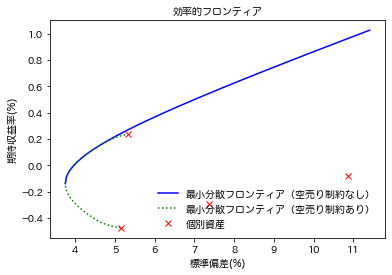

In [97]:
#%% 最小分散フロンティアの作図
sigma_gmv = 1.0 / np.sqrt(C)
sigma_p = np.linspace(sigma_gmv, 1.05 * np.max(Stdev), num=250)
mu_p_efficient = (A + np.sqrt(np.abs(C * sigma_p ** 2 - 1.0) * D)) / C
fig2 = plt.figure(num=2, facecolor='w')           
plt.plot(sigma_p, mu_p_efficient, 'b-')
plt.plot(V_Risk, V_Target, 'g:')
plt.plot(np.sqrt(np.diagonal(Sigma)), Mu, 'rx')
plt.legend(['最小分散フロンティア（空売り制約なし）',
            '最小分散フロンティア（空売り制約あり）',
            '個別資産'],
           loc='best', frameon=False, prop=jpfont)
plt.title('効率的フロンティア', fontproperties=jpfont)
plt.xlabel('標準偏差(%)', fontproperties=jpfont)
plt.ylabel('期待収益率(%)', fontproperties=jpfont)
#plt.savefig('efficient_frontier(空売り制約あり)_改.png', dpi=1500)

<Figure size 432x288 with 0 Axes>

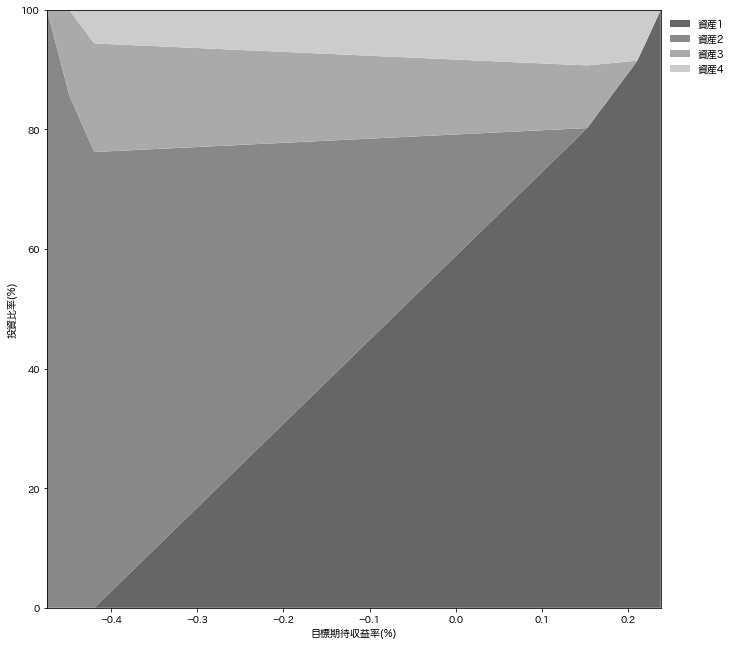

In [98]:
#   投資比率の推移の作図
fig3 = plt.figure(num=3, facecolor='w')
plt.figure(figsize=(11, 11))
plt.stackplot(V_Target, V_Weight.T*100,
              colors=tuple([tuple(gray*np.ones(3))
                            for gray in np.linspace(0.4, 0.8, num=Mu.shape[0])
                            ]))
plt.axis([Mu.min(), Mu.max(), 0.0, 100.0])
plt.legend(['資産1', '資産2', '資産3', '資産4', '資産5', '資産6', '資産7', '資産8', '資産9', '資産10', '資産11', '資産12', '資産13', '資産14', '資産15', '資産16', '資産17', '資産18', '資産19', '資産20', '資産21', '資産22', '資産23', '資産24', '資産25', '資産26', '資産27', '資産28', '資産29', '資産30', '資産31', '資産32', '資産33', '資産34', '資産35', '資産36', '資産37', '資産38', '資産39', '資産40', '資産41', '資産42', '資産43', '資産44', '資産45', '資産46', '資産47', '資産48', '資産49', '資産50', '資産51', '資産52', '資産53', '資産54', '資産55', '資産56', '資産57'],
           loc='upper left', bbox_to_anchor=(1.0, 1.0),
           frameon=False, prop=jpfont)
plt.xlabel('目標期待収益率(%)', fontproperties=jpfont)
plt.ylabel('投資比率(%)', fontproperties=jpfont)
#plt.savefig('投資割合.png', dpi=1000)
plt.show()

In [99]:
#
# 最適ポートフォリオの決定
#

umax=0
for i in range(len(V_Weight)):
    if V_Target[i] <= 0:
        u=((math.log(-1 * V_Target[i]))+(-1 * math.log(18-V_Risk[i])))*100
        if u>umax:
            umax=u
            maxi=i
        print('(',i,') 目標収益率=%.3f リスク=%.3f 効用=%.3f'
              %(V_Target[i],V_Risk[i],u))
        print('ポートフォリオ=%.3f,%.3f,%.3f,%.3f'#,%.3f,%.3f'#,%.3f,%.3f,%.3f,%.3f,%.3f'#,%.3f,%.3f,%.3f,%.3f'
              %(V_Weight[i][0],V_Weight[i][1],V_Weight[i][2],V_Weight[i][3]))#,V_Weight[i][4],V_Weight[i][5]))#,V_Weight[i][6],V_Weight[i][7],V_Weight[i][8],V_Weight[i][9],V_Weight[i][10]))#,V_Weight[i][11],V_Weight[i][12],V_Weight[i][13],V_Weight[i][14]))
        
    else:
        u=(math.log(V_Target[i])+math.log(18-V_Risk[i]))*100
        if u>umax:
            umax=u
            maxi=i
        print('(',i,') 目標収益率=%.3f リスク=%.3f 効用=%.3f'
              %(V_Target[i],V_Risk[i],u))
        print('ポートフォリオ=%.3f,%.3f,%.3f,%.3f'#,%.3f,%.3f'#,%.3f,%.3f,%.3f,%.3f,%.3f'#,%.3f,%.3f,%.3f,%.3f'
              %(V_Weight[i][0],V_Weight[i][1],V_Weight[i][2],V_Weight[i][3]))#,V_Weight[i][4],V_Weight[i][5]))#,V_Weight[i][6],V_Weight[i][7],V_Weight[i][8],V_Weight[i][9],V_Weight[i][10]))#,V_Weight[i][11],V_Weight[i][12],V_Weight[i][13],V_Weight[i][14]))
print('\n効用の最大値（',maxi,'）',np.round(umax,3))

( 0 ) 目標収益率=-0.474 リスク=5.145 効用=-329.996
ポートフォリオ=-0.000,1.000,-0.000,0.000
( 1 ) 目標収益率=-0.471 リスク=5.093 効用=-331.001
ポートフォリオ=0.000,0.984,0.016,0.000
( 2 ) 目標収益率=-0.468 リスク=5.044 効用=-331.988
ポートフォリオ=-0.000,0.968,0.032,-0.000
( 3 ) 目標収益率=-0.466 リスク=4.998 効用=-332.957
ポートフォリオ=-0.000,0.953,0.047,0.000
( 4 ) 目標収益率=-0.463 リスク=4.954 効用=-333.908
ポートフォリオ=0.000,0.937,0.063,0.000
( 5 ) 目標収益率=-0.460 リスク=4.913 効用=-334.841
ポートフォリオ=-0.000,0.921,0.079,0.000
( 6 ) 目標収益率=-0.457 リスク=4.875 効用=-335.755
ポートフォリオ=-0.000,0.905,0.095,0.000
( 7 ) 目標収益率=-0.454 リスク=4.840 効用=-336.650
ポートフォリオ=-0.000,0.889,0.111,0.000
( 8 ) 目標収益率=-0.451 リスク=4.808 効用=-337.526
ポートフォリオ=-0.000,0.873,0.127,0.000
( 9 ) 目標収益率=-0.448 リスク=4.779 効用=-338.382
ポートフォリオ=0.000,0.858,0.142,0.000
( 10 ) 目標収益率=-0.446 リスク=4.752 効用=-339.226
ポートフォリオ=-0.000,0.848,0.146,0.006
( 11 ) 目標収益率=-0.443 リスク=4.726 効用=-340.065
ポートフォリオ=-0.000,0.839,0.150,0.011
( 12 ) 目標収益率=-0.440 リスク=4.701 効用=-340.899
ポートフォリオ=0.000,0.830,0.154,0.017
( 13 ) 目標収益率=-0.437 リスク=4.678 効用=-341

# 6回目

In [100]:
Asset_Weight_tmp = []

for i in range(4):
    Asset_Weight_tmp.append(round(V_Weight[249][i], 3))

In [101]:
sum(Asset_Weight_tmp)

1.0

In [102]:
Asset_Weight_tmp

[1.0, -0.0, 0.0, -0.0]

In [103]:
data_column = marketcap.columns.tolist()

In [104]:
data_column

['ＫＤＤＩ', 'ローソン', '東洋紡', 'コニカミノルタ']

In [105]:
for i in range(4):
    if not(Asset_Weight_tmp[i] <= 0.005):
        del marketcap[data_column[i]]

In [106]:
marketcap

ローソン   東洋紡  コニカミノルタ
0   7910  1950      836
1   7260  1640      932
2   7970  1690      850
3   7980  1720      941
4   7920  1720     1092
..   ...   ...      ...
56  5430  1424      600
57  4900  1322      618
58  4930  1352      598
59  5140  1333      614
60  5490  1384      560

[61 rows x 3 columns]

In [107]:
R = (marketcap.diff()/marketcap.shift(1))[1:]*100

In [108]:
R

ローソン        東洋紡    コニカミノルタ
1   -8.217446 -15.897436  11.483254
2    9.779614   3.048780  -8.798283
3    0.125471   1.775148  10.705882
4   -0.751880   0.000000  16.046759
5    3.661616   1.162791   6.318681
6    0.365408   5.172414   0.947459
7   -5.946602   6.557377  -7.593857
8   -2.580645  -1.025641  -8.033241
9   -1.986755   2.072539  -1.104418
10   2.027027  -1.015228 -11.573604
11   4.105960   5.641026   7.003444
12  -4.452926   1.941748  -1.931330
13  -1.597870  -5.238095  -3.938731
14   0.811908   7.688442   5.239180
15  -0.671141   1.679888   6.926407
16   4.594595  -6.057825  10.931174
17  -3.229974   0.000000  -1.094891
18  -1.468625   1.465559   0.184502
19  -5.284553   1.444391  -8.747698
20   3.719599  -0.379687  -7.971746
21  -0.275862   1.667461   3.070175
22  -1.936376 -15.229616   5.744681
23  -2.397743   1.879491   3.521127
24  -3.034682   2.441671  -2.721088
25  -2.831595   7.415254  12.987013
26   6.134969  -4.930966   6.808134
27   3.179191 -16.701245  -7.201987
28   4.061625   2.303861  -8.831401
29  -6.460296  -8.764455  -2.837573
30  -3.453237   7.671781  10.070493
31   0.596125  -2.168525  -1.189387
32  -9.037037 -10.386320   0.833333
33 -15.472313   2.544170   2.295684
34  -2.312139 -19.090283 -14.003591
35   1.972387   9.540034   9.498956
36   5.415861   5.987558 -13.250715
37  -3.302752  -0.733676 -16.923077
38   4.933586   4.730229  -0.529101
39   8.137432   3.810868   6.250000
40  -0.334448   8.701564 -10.262829
41   3.859060   4.190119  -0.557880
42   2.423263  -9.003601  -4.628331
43  -9.621451 -10.488127 -13.823529
44   3.490401 -15.770081 -25.085324
45  -6.070826  10.936133  -4.100228
46   7.001795  19.006309  -5.225653
47  -9.228188  -0.596421  -6.766917
48  -2.957486  -2.800000 -25.268817
49  -0.380952   4.801097  23.381295
50  -4.015296  -5.301047 -13.702624
51  -4.282869  -4.284727 -10.810811
52  -1.560874  -5.776173  26.515152
53   1.585624   5.747126  17.964072
54   5.723205  -5.144928  14.974619
55  -2.066929   2.521008  18.984547
56   9.145729   6.110283  11.317254
57  -9.760589  -7.162921   3.000000
58   0.612245   2.269289  -3.236246
59   4.259635  -1.405325   2.675585
60   6.809339   3.825956  -8.794788

In [109]:
#%% 最小分散ポートフォリオの計算
Mu = R.mean().values
Stdev = R.std().values
CorrMatrix = R.corr().values
Sigma = np.diag(Stdev) @ CorrMatrix @ np.diag(Stdev)
iota = np.ones(Mu.shape)

In [121]:

Mu

array([-0.47416147, -0.29334974, -0.08101385])

In [110]:
inv_Sigma = lin.inv(Sigma)
A = Mu @ inv_Sigma @ iota
B = Mu @ inv_Sigma @ Mu
C = iota @ inv_Sigma @ iota
D = B * C - A ** 2
V_Target = np.linspace(Mu.min(), Mu.max(), num=5)
V_Risk = np.zeros(V_Target.shape)
V_Weight = np.zeros((V_Target.shape[0], Mu.shape[0]))
for idx, Target_Return in enumerate(V_Target):
    V_Weight[idx, :] = (C * Target_Return - A) / D * lin.solve(Sigma, Mu) \
                       + (B - A * Target_Return) / D * lin.solve(Sigma, iota)
    V_Risk[idx] = (C / D) * (Target_Return - A / C) ** 2 + 1.0 / C

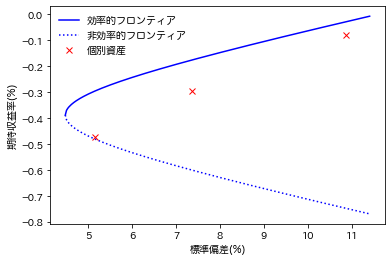

In [111]:
#%% 最小分散フロンティアの作図
sigma_gmv = 1.0 / np.sqrt(C)
sigma_p = np.linspace(sigma_gmv, 1.05 * np.max(Stdev), num=250)
mu_p_efficient = (A + np.sqrt(np.abs(C * sigma_p ** 2 - 1.0) * D)) / C
mu_p_inefficient = (A - np.sqrt(np.abs(C * sigma_p ** 2 - 1.0) * D)) / C
fig1 = plt.figure(num=1, facecolor='w')
plt.plot(sigma_p, mu_p_efficient, 'b-')
plt.plot(sigma_p, mu_p_inefficient, 'b:')
plt.plot(np.sqrt(np.diagonal(Sigma)), Mu, 'rx')
plt.legend(['効率的フロンティア', '非効率的フロンティア', '個別資産'],
           loc='best', frameon=False, prop=jpfont)
plt.xlabel('標準偏差(%)', fontproperties=jpfont)
plt.ylabel('期待収益率(%)', fontproperties=jpfont)
#plt.savefig('efficient_frontier.png', dpi=1000)
plt.show()

In [112]:
#%% 空売り制約の下での分散最小化問題の設定
Weight = cvx.Variable(Mu.shape[0])
Target_Return = cvx.Parameter(nonneg=False)
Risk_Variance = cvx.quad_form(Weight, Sigma)
Opt_Portfolio = cvx.Problem(cvx.Minimize(Risk_Variance),
                            [Weight.T @ Mu == Target_Return,
                             cvx.sum(Weight) == 1.0,
                             Weight >= 0.0])

In [113]:
#%% 空売り制約の下での最小分散フロンティアの計算
V_Target = np.linspace(Mu.min(), Mu.max(), num=250)
V_Risk = np.zeros(V_Target.shape)
V_Weight = np.zeros((V_Target.shape[0], Mu.shape[0]))
for idx, Target_Return.value in enumerate(V_Target):
    Opt_Portfolio.solve(solver=cvx.ECOS)
    V_Weight[idx, :] = Weight.value.T
    V_Risk[idx] = np.sqrt(Risk_Variance.value)

Text(0, 0.5, '期待収益率(%)')

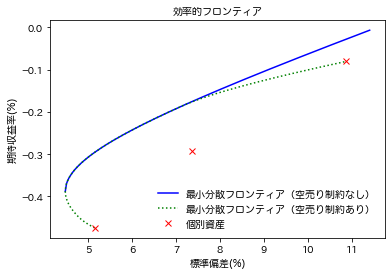

In [114]:
#%% 最小分散フロンティアの作図
sigma_gmv = 1.0 / np.sqrt(C)
sigma_p = np.linspace(sigma_gmv, 1.05 * np.max(Stdev), num=250)
mu_p_efficient = (A + np.sqrt(np.abs(C * sigma_p ** 2 - 1.0) * D)) / C
fig2 = plt.figure(num=2, facecolor='w')           
plt.plot(sigma_p, mu_p_efficient, 'b-')
plt.plot(V_Risk, V_Target, 'g:')
plt.plot(np.sqrt(np.diagonal(Sigma)), Mu, 'rx')
plt.legend(['最小分散フロンティア（空売り制約なし）',
            '最小分散フロンティア（空売り制約あり）',
            '個別資産'],
           loc='best', frameon=False, prop=jpfont)
plt.title('効率的フロンティア', fontproperties=jpfont)
plt.xlabel('標準偏差(%)', fontproperties=jpfont)
plt.ylabel('期待収益率(%)', fontproperties=jpfont)
#plt.savefig('efficient_frontier(空売り制約あり)_改.png', dpi=1500)

<Figure size 432x288 with 0 Axes>

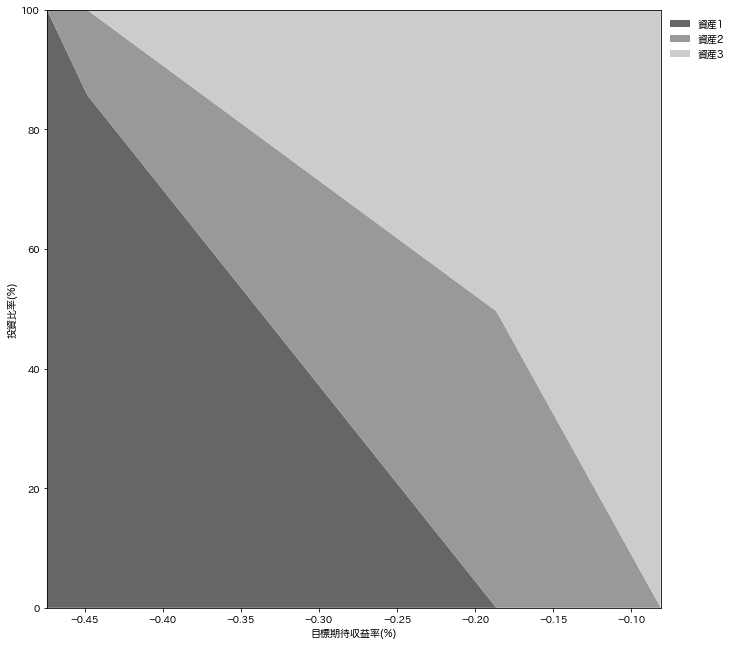

In [115]:
#   投資比率の推移の作図
fig3 = plt.figure(num=3, facecolor='w')
plt.figure(figsize=(11, 11))
plt.stackplot(V_Target, V_Weight.T*100,
              colors=tuple([tuple(gray*np.ones(3))
                            for gray in np.linspace(0.4, 0.8, num=Mu.shape[0])
                            ]))
plt.axis([Mu.min(), Mu.max(), 0.0, 100.0])
plt.legend(['資産1', '資産2', '資産3', '資産4', '資産5', '資産6', '資産7', '資産8', '資産9', '資産10', '資産11', '資産12', '資産13', '資産14', '資産15', '資産16', '資産17', '資産18', '資産19', '資産20', '資産21', '資産22', '資産23', '資産24', '資産25', '資産26', '資産27', '資産28', '資産29', '資産30', '資産31', '資産32', '資産33', '資産34', '資産35', '資産36', '資産37', '資産38', '資産39', '資産40', '資産41', '資産42', '資産43', '資産44', '資産45', '資産46', '資産47', '資産48', '資産49', '資産50', '資産51', '資産52', '資産53', '資産54', '資産55', '資産56', '資産57'],
           loc='upper left', bbox_to_anchor=(1.0, 1.0),
           frameon=False, prop=jpfont)
plt.xlabel('目標期待収益率(%)', fontproperties=jpfont)
plt.ylabel('投資比率(%)', fontproperties=jpfont)
#plt.savefig('投資割合.png', dpi=1000)
plt.show()

In [116]:
#
# 最適ポートフォリオの決定
#

umax=0
for i in range(len(V_Weight)):
    if V_Target[i] <= 0:
        u=((math.log(-1 * V_Target[i]))+(-1 * math.log(18-V_Risk[i])))*100
        if u>umax:
            umax=u
            maxi=i
        print('(',i,') 目標収益率=%.3f リスク=%.3f 効用=%.3f'
              %(V_Target[i],V_Risk[i],u))
        print('ポートフォリオ=%.3f,%.3f,%.3f'#,%.3f,%.3f,%.3f'#,%.3f,%.3f,%.3f,%.3f,%.3f'#,%.3f,%.3f,%.3f,%.3f'
              %(V_Weight[i][0],V_Weight[i][1],V_Weight[i][2]))#,V_Weight[i][3],V_Weight[i][4],V_Weight[i][5]))#,V_Weight[i][6],V_Weight[i][7],V_Weight[i][8],V_Weight[i][9],V_Weight[i][10]))#,V_Weight[i][11],V_Weight[i][12],V_Weight[i][13],V_Weight[i][14]))
        
    else:
        u=(math.log(V_Target[i])+math.log(18-V_Risk[i]))*100
        if u>umax:
            umax=u
            maxi=i
        print('(',i,') 目標収益率=%.3f リスク=%.3f 効用=%.3f'
              %(V_Target[i],V_Risk[i],u))
        print('ポートフォリオ=%.3f,%.3f,%.3f'#,%.3f,%.3f,%.3f'#,%.3f,%.3f,%.3f,%.3f,%.3f'#,%.3f,%.3f,%.3f,%.3f'
              %(V_Weight[i][0],V_Weight[i][1],V_Weight[i][2]))#,V_Weight[i][3],V_Weight[i][4],V_Weight[i][5]))#,V_Weight[i][6],V_Weight[i][7],V_Weight[i][8],V_Weight[i][9],V_Weight[i][10]))#,V_Weight[i][11],V_Weight[i][12],V_Weight[i][13],V_Weight[i][14]))
print('\n効用の最大値（',maxi,'）',np.round(umax,3))

( 0 ) 目標収益率=-0.474 リスク=5.145 効用=-329.996
ポートフォリオ=1.000,0.000,-0.000
( 1 ) 目標収益率=-0.473 リスク=5.116 効用=-330.553
ポートフォリオ=0.991,0.009,0.000
( 2 ) 目標収益率=-0.471 リスク=5.088 効用=-331.104
ポートフォリオ=0.983,0.017,0.000
( 3 ) 目標収益率=-0.469 リスク=5.061 効用=-331.651
ポートフォリオ=0.974,0.026,0.000
( 4 ) 目標収益率=-0.468 リスク=5.034 効用=-332.192
ポートフォリオ=0.965,0.035,0.000
( 5 ) 目標収益率=-0.466 リスク=5.009 効用=-332.727
ポートフォリオ=0.956,0.044,0.000
( 6 ) 目標収益率=-0.465 リスク=4.984 効用=-333.257
ポートフォリオ=0.948,0.052,0.000
( 7 ) 目標収益率=-0.463 リスク=4.960 効用=-333.781
ポートフォリオ=0.939,0.061,0.000
( 8 ) 目標収益率=-0.462 リスク=4.937 効用=-334.300
ポートフォリオ=0.930,0.070,0.000
( 9 ) 目標収益率=-0.460 リスク=4.915 効用=-334.813
ポートフォリオ=0.921,0.079,0.000
( 10 ) 目標収益率=-0.458 リスク=4.893 効用=-335.320
ポートフォリオ=0.913,0.087,-0.000
( 11 ) 目標収益率=-0.457 リスク=4.873 効用=-335.822
ポートフォリオ=0.904,0.096,-0.000
( 12 ) 目標収益率=-0.455 リスク=4.853 効用=-336.318
ポートフォリオ=0.895,0.105,0.000
( 13 ) 目標収益率=-0.454 リスク=4.834 効用=-336.807
ポートフォリオ=0.886,0.114,0.000
( 14 ) 目標収益率=-0.452 リスク=4.816 効用=-337.291
ポートフォリオ=0.878

In [117]:
"""
for i in range(15):
    if Asset_Weight_tmp[i] == 0.001:
        Asset_Weight_tmp[i] = 0.0
"""
"""
Asset_Weight_tmp[0] = round((Asset_Weight_tmp[0] + (0.001 )), 3)
Asset_Weight_tmp[13] = Asset_Weight_tmp[13] + Asset_Weight_tmp[0]
Asset_Weight_tmp[0] = 0.0
Asset_Weight_tmp
"""

'\nAsset_Weight_tmp[0] = round((Asset_Weight_tmp[0] + (0.001 )), 3)\nAsset_Weight_tmp[13] = Asset_Weight_tmp[13] + Asset_Weight_tmp[0]\nAsset_Weight_tmp[0] = 0.0\nAsset_Weight_tmp\n'

In [118]:
sum(Asset_Weight_tmp)

1.0

In [119]:
Asset_Weight_tmp.count(0)

3

In [120]:
Assets_Cov = R.cov()
Asset_Weight_tmp =np.array(Asset_Weight_tmp)
print('リスクは' + str(np.sqrt(np.dot(Asset_Weight_tmp.T, np.dot(Assets_Cov, Asset_Weight_tmp)))))

ValueError: shapes (3,3) and (4,) not aligned: 3 (dim 1) != 4 (dim 0)

In [ ]:
Data1 = pd.read_csv('efficient_frontier(ver1.7).csv', encoding='Shift_JIS')
del Data1['銘柄名称']
del Data1['キヤノン']
Data1.drop(index=[61, 62, 63], inplace=True)

Data2 = (Data1.diff()/Data1.shift(1))[1:] * 100 
column = Data2.columns.tolist()
column.pop(1)
column.pop(0)

Assets_Cov = R.cov()

df = pd.DataFrame(data=Data2['日経平均'])
df['TOPIX'] = Data2['TOPIX']

iterate_n = 4

Asset_Weights = []
Portfolio_Return = []
Portfolio_Risk = []
Utility = []

for i_1 in range(iterate_n):
    for i_2 in range(iterate_n):
        for i_3 in range(iterate_n):
            for i_4 in range(iterate_n):
                for i_5 in range(iterate_n):
                    for i_6 in range(iterate_n):
                        for i_7 in range(iterate_n):
                            for i_8 in range(iterate_n):
                                for i_9 in range(iterate_n):
                                    for i_10 in range(iterate_n):
                                        for i_11 in range(iterate_n):
                                        
                                            Asset_Weight = [] #初期化
                                        
                                            Sum_of_zero_Assets_tmp = []
                                        
                                            Sum_of_zero_Assets_tmp.append(((i_1 + 4)*2.5)/500)
                                            Sum_of_zero_Assets_tmp.append(((i_2 + 4)*2.5)/500)
                                            Sum_of_zero_Assets_tmp.append(((i_3 + 4)*2.5)/500)
                                            Sum_of_zero_Assets_tmp.append(((i_4 + 4)*2.5)/500)
                                            Sum_of_zero_Assets_tmp.append(((i_5 + 4)*2.5)/500)
                                            Sum_of_zero_Assets_tmp.append(((i_6 + 4)*2.5)/500)
                                            Sum_of_zero_Assets_tmp.append(((i_7 + 4)*2.5)/500)
                                            Sum_of_zero_Assets_tmp.append(((i_8 + 4)*2.5)/500)
                                            Sum_of_zero_Assets_tmp.append(((i_9 + 4)*2.5)/500)
                                            Sum_of_zero_Assets_tmp.append(((i_10 + 4)*2.5)/500)
                                            Sum_of_zero_Assets_tmp.append(((i_11 + 4)*2.5)/500)
                                        
                                            Sum_of_zero_Assets = sum(Sum_of_zero_Assets_tmp)
                                        
                                            Data1 = pd.read_csv('efficient_frontier(ver1.7).csv', encoding='Shift_JIS')
                                            del Data1['銘柄名称']
                                            del Data1['キヤノン']
                                        
                                            Data1.drop(index=[61, 62, 63], inplace=True)
    
                                            #収益率などの計算
                                            Data2 = (Data1.diff()/Data1.shift(1))[1:] * 100 
                                            column = Data2.columns.tolist()
                                            column.pop(1)
                                            column.pop(0)
                                        
                                            """
                                            for j in range(15):
                                                if Asset_Weight_tmp[j] == 0:
                                                    Asset_Weight.append(min_lev)
            
                                                else:
                                                    Asset_Weight.append(round((Asset_Weight_tmp[j] * (1 - Sum_of_zero_Assets * Asset_Weight_tmp.count(0))), 3))
                                            """
                                
                            
                                            Asset_Weight.append(((i_1+4)*2.5)/500)
                                            Asset_Weight.append(round((Asset_Weight_tmp[1] * (1 - Sum_of_zero_Assets)), 3))
                                            Asset_Weight.append(((i_2+4)*2.5)/500)
                                            Asset_Weight.append(((i_3+4)*2.5)/500)
                                            Asset_Weight.append(round((Asset_Weight_tmp[4] * (1 - Sum_of_zero_Assets)), 3))
                                            Asset_Weight.append(round((Asset_Weight_tmp[5] * (1 - Sum_of_zero_Assets)), 3))
                                            Asset_Weight.append(((i_4+4)*2.5)/500)
                                            Asset_Weight.append(((i_5+4)*2.5)/500)
                                            Asset_Weight.append(((i_6+4)*2.5)/500)
                                            Asset_Weight.append(((i_7 +4)*2.5)/500)
                                            Asset_Weight.append(((i_8 + 4)*2.5)/500)
                                            Asset_Weight.append(((i_9 + 4)*2.5)/500)
                                            Asset_Weight.append(((i_10 + 4)*2.5)/500)
                                            Asset_Weight.append(round((Asset_Weight_tmp[13] * (1 - Sum_of_zero_Assets)), 3))
                                            Asset_Weight.append(((i_11 + 4)*2.5)/500)
                                        
                                            Asset_Weight = np.array(Asset_Weight)
                                    
                                            Asset_Weights.append(Asset_Weight)
                                            #print(sum(Asset_Weight))
                                            #print('リターンは' + str(sum(Mu * Asset_Weight)))
                                            Portfolio_Return.append(sum(Mu * Asset_Weight))
                                            #print('リスクは' + str(np.sqrt(np.dot(Asset_Weight.T, np.dot(Assets_Cov, Asset_Weight)))))
                                            Portfolio_Risk.append(np.sqrt(np.dot(Asset_Weight.T, np.dot(Assets_Cov, Asset_Weight))))
                                            Utility.append(((math.log(sum(Mu * Asset_Weight))+(math.log(18 - (np.sqrt(np.dot(Asset_Weight.T, np.dot(Assets_Cov, Asset_Weight))))))))*100)
    
                                            """
                                            for k in range(15):
                                                Data2[column[k]] = (Data2[column[k]] * Asset_Weight[k])
        
                                            for l in range(15):
                                                if l == 0:
                                                    Data2['Portfolio'] = Data2[column[l]]
        
                                                else:
                                                    Data2['Portfolio'] = Data2['Portfolio'] + Data2[column[l]]
        
                                            df[str(Asset_Weight)] = Data2['Portfolio']
                                            """
"""
l_d = len(df)

Perform1 = [[] for i in range(100)]

for i in range(100):
    for j in range(l_d):
        if df.iloc[j, 0] <  df.iloc[j, i + 2]:
            Perform1[i].append('Win')
        else:
            Perform1[i].append('Lose')
        
Perform2 = [[] for i in range(100)]

for i in range(100):
    for j in range(l_d):
        if df.iloc[j, 1] < df.iloc[j, i + 2]:
            Perform2[i].append('Win')
        else:
            Perform2[i].append('Lose')
            
Win_nikkei = []

for i in range(100):
    Win_nikkei.append(Perform1[i].count('Win'))
    
Win_TOPIX = []

for i in range(100):
    Win_TOPIX.append(Perform2[i].count('Win'))
            
DF = df.copy()

for i in range (102):
    for j in range(len(DF)):
        if j == 0:
            DF.iloc[j, i] = DF.iloc[j, i]
            
        else:
            DF.iloc[j, i] = DF.iloc[j, i] + DF.iloc[j - 1, i]
            
Perform3 = [[] for i in range(100)]

for i in range(100):
    for j in range(l_d):
        if DF.iloc[j, 0] <  DF.iloc[j, i + 2]:
            Perform3[i].append('Win')
        else:
            Perform3[i].append('Lose')
        
Perform4 = [[] for i in range(100)]

for i in range(100):
    for j in range(l_d):
        if DF.iloc[j, 1] < DF.iloc[j, i + 2]:
            Perform4[i].append('Win')
        else:
            Perform4[i].append('Lose')
            
Win_nikkei_tmp = []

for i in range(100):
    Win_nikkei_tmp.append(Perform3[i].count('Win'))
    
Win_TOPIX_tmp = []

for i in range(100):
    Win_TOPIX_tmp.append(Perform4[i].count('Win'))
"""

In [ ]:
sum(Asset_Weights[0])

In [ ]:
len(Utility)

In [ ]:
Number = [i for i in range(len(Utility))]

In [ ]:
plt.scatter(Number, Utility, s=0.5, color='orange')
#plt.savefig('/Users/shintaro/Downloads/Utility.png', dpi=500)

In [ ]:
plt.scatter(Number, Portfolio_Risk, s=0.1, color='orange')

In [ ]:
plt.scatter(Number, Portfolio_Return, s=0.1, color='orange')

In [ ]:
str(Asset_Weight)

In [ ]:
Stdev

In [ ]:
5**11

In [ ]:
4**11

In [ ]:
Asset_Weight_tmp = Asset_Weight_tmp.tolist()

In [ ]:
Data1 = pd.read_csv('efficient_frontier(ver1.7).csv', encoding='Shift_JIS')
del Data1['銘柄名称']
del Data1['キヤノン']
Data1.drop(index=[61, 62, 63], inplace=True)

Data2 = (Data1.diff()/Data1.shift(1))[1:] * 100 
column = Data2.columns.tolist()
column.pop(1)
column.pop(0)

Assets_Cov = R.cov()

df = pd.DataFrame(data=Data2['日経平均'])
df['TOPIX'] = Data2['TOPIX']

iterate_n = 2001

Asset_Weights = []
Portfolio_Return = []
Portfolio_Risk = []
Utility = []

for i_1 in range(iterate_n):
    
    min_lev = ((i_1/100)/500)
    
    Asset_Weight = []
    for i in range(15):
        if Asset_Weight_tmp[i] == 0:
            Asset_Weight.append(min_lev)
            
        else:
            Asset_Weight.append(round((Asset_Weight_tmp[i]*( 1 - min_lev * Asset_Weight_tmp.count(0))), 3))
            
    Data1 = pd.read_csv('efficient_frontier(ver1.7).csv', encoding='Shift_JIS')
    del Data1['銘柄名称']
    del Data1['キヤノン']
                                        
    Data1.drop(index=[61, 62, 63], inplace=True)
    
    #収益率などの計算
    Data2 = (Data1.diff()/Data1.shift(1))[1:] * 100 
    column = Data2.columns.tolist()
    column.pop(1)
    column.pop(0)

                                            
    for k in range(15):
        Data2[column[k]] = (Data2[column[k]] * Asset_Weight[k])
        
    for l in range(15):
        if l == 0:
            Data2['Portfolio'] = Data2[column[l]]
        
        else:
            Data2['Portfolio'] = Data2['Portfolio'] + Data2[column[l]]
        
    df[str(Asset_Weight)] = Data2['Portfolio']
                                            
"""
l_d = len(df)

Perform1 = [[] for i in range(100)]

for i in range(100):
    for j in range(l_d):
        if df.iloc[j, 0] <  df.iloc[j, i + 2]:
            Perform1[i].append('Win')
        else:
            Perform1[i].append('Lose')
        
Perform2 = [[] for i in range(100)]

for i in range(100):
    for j in range(l_d):
        if df.iloc[j, 1] < df.iloc[j, i + 2]:
            Perform2[i].append('Win')
        else:
            Perform2[i].append('Lose')
            
Win_nikkei = []

for i in range(100):
    Win_nikkei.append(Perform1[i].count('Win'))
    
Win_TOPIX = []

for i in range(100):
    Win_TOPIX.append(Perform2[i].count('Win'))
"""
DF = df.copy()

for i in range (iterate_n + 2):
    for j in range(len(DF)):
        if j == 0:
            DF.iloc[j, i] = DF.iloc[j, i]
            
        else:
            DF.iloc[j, i] = DF.iloc[j, i] + DF.iloc[j - 1, i]
"""           
Perform3 = [[] for i in range(100)]

for i in range(100):
    for j in range(l_d):
        if DF.iloc[j, 0] <  DF.iloc[j, i + 2]:
            Perform3[i].append('Win')
        else:
            Perform3[i].append('Lose')
        
Perform4 = [[] for i in range(100)]

for i in range(100):
    for j in range(l_d):
        if DF.iloc[j, 1] < DF.iloc[j, i + 2]:
            Perform4[i].append('Win')
        else:
            Perform4[i].append('Lose')
            
Win_nikkei_tmp = []

for i in range(100):
    Win_nikkei_tmp.append(Perform3[i].count('Win'))
    
Win_TOPIX_tmp = []

for i in range(100):
    Win_TOPIX_tmp.append(Perform4[i].count('Win'))
"""

In [ ]:
df

In [ ]:
DF

In [ ]:
Win_nikkei_tmp[30]

In [ ]:
Win_TOPIX_tmp[30]

In [ ]:
l1 = []

for i in range(50):
    if Win_nikkei[i] == 74 :#or Win_nikkei[i] == 72 :#or Win_nikkei[i] == 71 :
        l1.append(i)
        
l1

In [ ]:
l2 = []
for i in range(50):
    if Win_TOPIX[i] == 76 :#or Win_TOPIX[i] == 75 or Win_TOPIX[i] == 74:
        l2.append(i)
        
l2

In [ ]:
l3 = []

for i in range(len(l2)):
    if l2[i] in l1:
        l3.append(l2[i])
        
l3

In [ ]:
df.plot(figsize=(20,20), alpha = 0.7, colormap = 'autumn')
#plt.savefig('パフォーマンス比較.png', dpi = 500)

In [ ]:
DataFrame = DF.copy()
del DataFrame['日経平均']
del DataFrame['TOPIX']

In [ ]:
data_list1 = DF['日経平均'].tolist()
data_list2 = DF['TOPIX'].tolist()

In [ ]:
Data_set = pd.read_csv('efficient_frontier(ver1.7).csv', encoding = 'Shift_Jis')#, encoding = 'Shift_jis')
Data_set.drop(index=[61, 62, 63], inplace=True)
date = Data_set['銘柄名称'].tolist()
date.pop(0)

In [ ]:
DataFrame.set_axis(date, axis=0, inplace=True)

In [ ]:
DataFrame.plot(alpha = 0.7, colormap = 'autumn', legend = False)
plt.plot(data_list1, color = 'blue')#, linestyle = '--')
plt.plot(data_list2, color = 'green')#, linestyle = ':')
#DataFrame.plot(alpha = 0.7, colormap = 'autumn', legend = False)
plt.title('パフォーマンス比較')
plt.xlabel('Date')
plt.ylabel('累積収益率')
#plt.savefig('パフォーマンス比較_改(ver1.1).png', dpi = 1500)

In [ ]:
data_list1

In [ ]:
data_list2

In [ ]:
DataFrame

In [ ]:
pwd

In [ ]:
Asset_Weight_tmp

In [ ]:
sum(Asset_Weight_tmp)

In [ ]:
Asset_Weight = []

for i in  range(15):
    if Asset_Weight_tmp[i] == 0:
        Asset_Weight.append(round(10 / 500, 3))
        
    else:
        Asset_Weight.append(round((Asset_Weight_tmp[i] * (1 - (10 / 500 * Asset_Weight_tmp.count(0)))), 3))

In [ ]:
"""
Asset_Weight = []

for i in  range(15):
    if Asset_Weight_tmp[i] == 0:
        Asset_Weight.append(0)
        
    else:
        Asset_Weight.append(round(Asset_Weight_tmp[i], 3))
"""

In [ ]:
Asset_Weight

In [ ]:
sum(Asset_Weight)

In [ ]:
Data1 = pd.read_csv('efficient_frontier(ver1.7).csv', encoding='Shift_JIS')
del Data1['銘柄名称']
del Data1['キヤノン']

In [ ]:
#Data1 = pd.read_csv('test_data(ver1.0).csv', encoding='Shift_JIS')
#del Data1['銘柄名称']
#del Data1['西日本フィナンシャルホールディングス']
#del Data1['関西電力']
#del Data1['静岡銀行']
#del Data1['キヤノン']

In [ ]:
#Data1 = Data1.reindex(columns = comp_list)

In [ ]:
Data2 = (Data1.diff()/Data1.shift(1))[1:] * 100 

In [ ]:
for i in range(len(Data2)):
    if math.isnan(Data2.iloc[i, 15]): #18
               Data2.iloc[i, 18] = 0

In [ ]:
column = Data2.columns.tolist()
column.pop(1)
column.pop(0)

In [ ]:
Data3 = (Data1.diff()/Data1.shift(1))[1:] * 100 
practice_1_tmp = Data3['エーザイ']
print(sum(practice_1_tmp) * Asset_Weight[0])
practice_1 = practice_1_tmp * Asset_Weight[0]
print(sum(practice_1))

In [ ]:
practice_1

In [ ]:
practice_2 = Data2['エーザイ']
print(sum(practice_2))
practice_1 == practice_2

In [ ]:
Data3

In [ ]:
Data3.mean()

In [ ]:
Data4 = Data3.sum()
#Data4.to_csv('portfolio_return(ver1.1).csv', encoding = 'shift_JIS')

In [ ]:
Data4[2] * Asset_Weight[0]

In [ ]:
#Data3.to_csv('protfolio_return(ver1.0).csv', encoding = 'Shift_JIS')

In [ ]:
for i in range(15):
    Data2[column[i]] = (Data2[column[i]] * Asset_Weight[i])

In [ ]:
for i in range(15):
    if i == 0:
        Data2['Portfolio'] = Data2[column[i]]
    
    else:
        Data2['Portfolio'] = Data2['Portfolio'] + Data2[column[i]]

In [ ]:
Data2

In [ ]:
df = pd.DataFrame(data=Data2['日経平均'])
df['TOPIX'] = Data2['TOPIX']
df['Portfolio'] = Data2['Portfolio']

In [ ]:
df

In [ ]:
df.plot(figsize=(20,20), alpha = 0.5)
#plt.savefig('パフォーマンス比較_毎次.png', dpi = 500)

In [ ]:
l_d = len(df)
Perform1 = []
for i in range(l_d):
    if df.iloc[i, 0] <  df.iloc[i, 2]:
        Perform1.append('Win')
    else:
        Perform1.append('Lose')
        
Perform2 = []
for i in range(l_d):
    if df.iloc[i, 1] < df.iloc[i, 2]:
        Perform2.append('Win')
    else:
        Perform2.append('Lose')

In [ ]:
Perform1.count('Win')

In [ ]:
Perform2.count('Win')

In [ ]:
Data1

In [ ]:
Data2

In [ ]:
for i in range (3):
    for j in range(len(df)):
        if j == 0:
            df.iloc[j, i] = df.iloc[j, i]
            
        else:
            df.iloc[j, i] = df.iloc[j, i] + df.iloc[j - 1, i]

In [ ]:
df#.to_csv('portfolio_return(ver1.2).csv', encoding = 'Shift_JIS')

In [ ]:
df.plot(figsize=(20,20), alpha = 0.5)
#plt.savefig('パフォーマンス比較_累積.png', dpi = 500)

In [ ]:
Asset_Weight

In [ ]:
Portfolio = []

for i in range(15):
    Portfolio.append(round((Asset_Weight[i] * 500), 3))

In [ ]:
Portfolio

In [ ]:
sum(Portfolio)

In [ ]:
max(Data2['アウトソーシング'])

In [ ]:
df_last = df.copy()

In [ ]:
del df_last['日経平均']

In [ ]:
Data_set = pd.read_csv('efficient_frontier(ver1.7).csv', encoding = 'Shift_Jis')#, encoding = 'Shift_jis')

In [ ]:
date = Data_set['銘柄名称'].tolist()
date.pop(0)

In [ ]:
len(date) == len(df_last)

In [ ]:
df_last.set_axis(date, axis=0, inplace=True)

In [ ]:
df_last

In [ ]:
l_d = len(df)
Perform1 = []
for i in range(l_d):
    if df.iloc[i, 0] <  df.iloc[i, 2]:
        Perform1.append('Win')
    else:
        Perform1.append('Lose')
        
Perform2 = []
for i in range(l_d):
    if df.iloc[i, 1] < df.iloc[i, 2]:
        Perform2.append('Win')
    else:
        Perform2.append('Lose')

In [ ]:
Perform1.count('Win')

In [ ]:
Perform2.count('Win')

In [ ]:
df_last.plot(figsize=(20,20),
             title='パフォーマンス比較_累積', 
             grid=False,
             legend=True,
             xlabel='Date',
             ylabel='累積収益率',
             fontsize=10,
             alpha = 0.5)
#plt.savefig('パフォーマンス比較_累積_最終.png', dpi = 700)